# Imports and paths

In [2]:
import pandas as pd
import os
import methylprep
#import methQC
import methylcheck
import glob
import numpy as np
from pymethylprocess.meffil_functions import r_autosomal_cpgs, remove_sex
from pymethylprocess.PreProcessDataTypes import PreProcessIDAT
from pymethylprocess.visualizations import umap_embed, plotly_plot, plot_heatmap, plot_cell_type_results, transform_plot
from pymethylprocess.PreProcessDataTypes import PreProcessPhenoData

from pymethylprocess.utils import remove_sex, remove_snps, est_age
from pymethylprocess.MethylationDataTypes import MethylationArray, ImputerObject
from pymethylprocess.preprocess import meffil_encode
import importlib
import numpy as np
from rpy2.robjects import pandas2ri, numpy2ri
import rpy2.robjects as robjects
np.__version__

'1.16.4'

In [3]:
idat_dir='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/'

#samplesheet='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/samplesheets/sample_sheet.csv'
#samplesheets_keepers='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/samplesheets/sample_sheet_keepers.csv'

samplesheet='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/299_Erlangener_Faelle_850K_edited_SJ.xlsx'
#FCD_1a_2a_2b_TSC_PMG.xlsx'
#Erlangener_Faelle_850K_edited_SJ.xlsx'
#299_Erlangener_Faelle_850K_edited_SJ.xlsx

phenosheet=output_sheet_name=idat_dir+'pheno_sheet.csv'

output_path='/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/preprocess_outputs/'
output_pickle=output_path+'methyl_array.pkl'

glob.glob('/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/*/*')


['/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R04C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R01C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R07C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R03C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R05C01_Red.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R06C01_Grn.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/202931510124/202931510124_R02C01_Grn.idat',
 '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IA_IIA_IIB_TSC_PMG/IDATS/2029

In [ ]:
#basenamelist=glob.glob(path+'*/*.idat');basenamelist[:4]

## Processing of phenosheet 

In [5]:
import IDAT_Processor
import importlib
importlib.reload(IDAT_Processor)

<module 'IDAT_Processor' from '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IDAT_Processor.py'>

In [4]:
from IDAT_Processor import PreProcessIDATs, PreProcessPhenoData

In [5]:
phenodata=PreProcessPhenoData(pheno_sheet=samplesheet, idat_dir=idat_dir, header_line=0)

In [6]:
pheno_sheet = pd.read_excel(samplesheet,header=0);pheno_sheet

ID  ID_MATERIAL_TYP             txt_idat  ALTER OP  ALTER Beginn  \
0    131972            54938  202818860053_R04C01      11.0           0.0   
1    131974            54939  202818860053_R05C01      11.0           0.0   
2    131976            54940  202818860053_R06C01      27.0           0.0   
3    131978            54941  202818860053_R07C01      27.0           0.0   
4    131980            54942  202818860053_R08C01      27.0           0.0   
..      ...              ...                  ...       ...           ...   
287  134752            56533  203220070086_R07C01       1.0           0.0   
288  134754            56534  203220070086_R08C01       3.0           0.0   
289  134756            56535  203220070058_R01C01       1.0           0.0   
290  134758            56536  203220070058_R02C01       1.0           0.0   
291  134760            56537  203220070058_R03C01       1.0           0.0   

     DAUER Dauer Gruppe SUPPLIER_NUMBER    Lokalisation Lokalisation Gruppe  \
0      0.0            0    SN 83/10 III  temporal - NCx              Cortex   
1      0.0            0    SN 83/10 III   temporal - WM           Marklager   
2      0.0            0   SN 120/16 III  temporal - NCx              Cortex   
3      0.0            0   SN 120/16 III   temporal - WM           Marklager   
4      0.0            0     SN 120/16 I   frontal - NCx              Cortex   
..     ...          ...             ...             ...                 ...   
287    1.0          1-5     1467/16 III         frontal            gemischt   
288    3.0          1-5       1061/17 7         frontal            gemischt   
289    1.0          1-5     1714/17 II2         frontal            gemischt   
290    1.0          1-5      182/18 IV1         frontal            gemischt   
291    1.0          1-5       1909/17 6         frontal            gemischt   

     ... PATIENT_GESCHLECHT KLINIK icEEG DNA Cluster  \
0    ...                  f   UKER   NaN        FFPE   
1    ...                  f   UKER   NaN        FFPE   
2    ...                  m   UKER   NaN        FFPE   
3    ...                  m   UKER   NaN        FFPE   
4    ...                  m   UKER   NaN        FFPE   
..   ...                ...    ...   ...         ...   
287  ...                  m   Mara   NaN        FFPE   
288  ...                  f   Mara   NaN        FFPE   
289  ...                  m   Mara   NaN        FFPE   
290  ...                  m   Mara   NaN        FFPE   
291  ...                  f    VGT   NaN        FFPE   

                                         txt_KOMMENTAR    PATIENT_NACHNAME  \
0    Forschungsproben Prof. Blümcke Erlangen; Dyspn...        SN 83/10 III   
1    Forschungsproben Prof. Blümcke Erlangen; Dyspn...        SN 83/10 III   
2    Forschungsproben Prof. Blümcke Erlangen; Lunge...  SN 120/16 (III, I)   
3    Forschungsproben Prof. Blümcke Erlangen; Lunge...  SN 120/16 (III, I)   
4    Forschungsproben Prof. Blümcke Erlangen; Lunge...  SN 120/16 (III, I)   
..                                                 ...                 ...   
287  Epilepsie seit der 1. Lebenswoche bei gesicher...         1467/16 III   
288  Frontallappenepilepsie links bei tuberöser Skl...           1061/17 7   
289  Links frontale Epilepsie bei tuberöser Skleros...         1714/17 II2   
290   Rechts frontale Epilepsie bei tuberöser Sklerose          182/18 IV1   
291  Epilepsie rechts zentral/frontal bei tuberöser...           1909/17 6   

    PATIENT_VORNAME dat_PATIENT_GEBURTSTAG v11b4_MaxCalScore  \
0              UKER               00:00:00           0,4535    
1              UKER               00:00:00           0,0147    
2              UKER               00:00:00           0,2614    
3              UKER               00:00:00           0,0101    
4              UKER               00:00:00           0,1998    
..              ...                    ...               ...   
287            Mara               00:00:00           0,2662    
288          

In [7]:
pheno_sheet=phenodata.format_custom(
              basename_col='txt_idat', 
              disease_class_column='Cluster DX', 
              include_columns={'ALTER Beginn':'age_onset',
                               'ALTER OP':'age_surgery',
                               'DAUER':'duration',                               
                               #'Lokalisation':'localisation', 
                               'Einsenderdiagnose':'diagnosis',
                               'KLINIK':'center',
                               'PATIENT_GESCHLECHT':'sex',
                               'SUPPLIER_NUMBER':'case_ID', 
                               'txt_idat':'identifier',
                               'Dauer Gruppe': 'duration_group',
                               'Lokalisation Gruppe': 'location_wm_cx',
                               'Lokalisation Cluster': 'location_region'
                               
                              }
                       )

Check whether your input data at the "sex"-column contains M for male and/ or F for Female


In [8]:
phenodata.format_sex_column('m','f')

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01  
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01  
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01  
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01  
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01  
..             ...  ..            ...     ...                  ...  
287       gemischt   M    1467/16 III     TSC  203220070086_R07C01  
288       gemischt   F      1061/17 7     TSC  203220070086_R08C01  
289       gemischt   M    1714/17 II2     TSC  203220070058_R01C01  
290       gemischt   M     182/18 IV1     TSC  203220070058_R02C01  
291       gemischt   F      1909/17 6     TSC  203220070058_R03C01  

[292 rows x 14 columns]

In [9]:
phenodata.create_ID(disease='disease', sample='identifier')

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
287       gemischt   M    1467/16 III     TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7     TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2     TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1     TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6     TSC  203220070058_R03C01   

                           ID  
0    CTRL.202818860053_R04C01  
1    CTRL.202818860053_R05C01  
2    CTRL.202818860053_R06C01  
3    CTRL.202818860053_R07C01  
4    CTRL.202818860053_R08C01  
..                        ...  
287   TSC.203220070086_R07C01  
288   TSC.203220070086_R08C01  
289   TSC.203220070058_R01C01  
290   TSC.203220070058_R02C01  
291   TSC.203220070058_R03C01  

[292 rows x 15 columns]

In [10]:
phenodata.pheno_sheet.isnull().sum()


age_onset          174
age_surgery          4
Basename             0
Batchnum             0
duration           150
duration_group     151
diagnosis            0
center               4
location_region     13
location_wm_cx      13
sex                  1
case_ID              0
disease              0
identifier           0
ID                   0
dtype: int64

In [11]:
keys=['age_surgery','center', 'location_region','location_wm_cx', 'sex']

In [12]:
imputation_df=phenodata.pheno_sheet[keys]; imputation_df

age_surgery center location_region location_wm_cx sex
0           11.0   UKER        temporal         Cortex   F
1           11.0   UKER        temporal      Marklager   F
2           27.0   UKER        temporal         Cortex   M
3           27.0   UKER        temporal      Marklager   M
4           27.0   UKER         frontal         Cortex   M
..           ...    ...             ...            ...  ..
287          1.0   Mara         frontal       gemischt   M
288          3.0   Mara         frontal       gemischt   F
289          1.0   Mara         frontal       gemischt   M
290          1.0   Mara         frontal       gemischt   M
291          1.0    VGT         frontal       gemischt   F

[292 rows x 5 columns]

In [13]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
#from sklearn.impute import KNNImputer
#imp = KNNImputer(n_neighbors=2, weights="uniform")
imp.fit(imputation_df)
test_pheno=pd.DataFrame(imp.transform(imputation_df),index = imputation_df.index.to_numpy(),
                  columns=imputation_df.columns)
#imputed=imp.transform(phenodata.pheno_sheet)    
test_pheno.isnull().sum()

age_surgery        0
center             0
location_region    0
location_wm_cx     0
sex                0
dtype: int64

In [14]:
phenodata.pheno_sheet[keys]=test_pheno.to_numpy()

In [15]:
phenodata.pheno_sheet.isnull().sum()

age_onset          174
age_surgery          0
Basename             0
Batchnum             0
duration           150
duration_group     151
diagnosis            0
center               0
location_region      0
location_wm_cx       0
sex                  0
case_ID              0
disease              0
identifier           0
ID                   0
dtype: int64

In [18]:
#pheno_sheet=phenodata.format_custom(
#              basename_col='txt_idat', 
#              disease_class_column='Diagnosis', 
#              include_columns={'age':'age',
#                               'sex':'sex',
#                               'Center':'Center',
#                               'Sample':'Sample', 
#                               'Lokalisation':'Lokalisation', 
#                               #'txt_idat':'txt_idat'
#                              }
#                       )

In [16]:
phenodata.pheno_sheet

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
287       gemischt   M    1467/16 III     TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7     TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2     TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1     TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6     TSC  203220070058_R03C01   

                           ID  
0    CTRL.202818860053_R04C01  
1    CTRL.202818860053_R05C01  
2    CTRL.202818860053_R06C01  
3    CTRL.202818860053_R07C01  
4    CTRL.202818860053_R08C01  
..                        ...  
287   TSC.203220070086_R07C01  
288   TSC.203220070086_R08C01  
289   TSC.203220070058_R01C01  
290   TSC.203220070058_R02C01  
291   TSC.203220070058_R03C01  

[292 rows x 15 columns]

In [20]:
exclude_disease_list=[
 'CTRL',
 'FCD 1A',
 'FCD 2A',
 'FCD 2B',
 'FCD 3A',
 
 'FCD 3C',
 'FCD 3D',
 'HME',
 'mMCD',
 'MOGHE',
 'PMG',
 
 
 ]
phenodata.pheno_sheet['disease'].unique().tolist()

['CTRL',
 'FCD 1A',
 'FCD 2A',
 'FCD 2B',
 'FCD 3A',
 'FCD 3B',
 'FCD 3C',
 'FCD 3D',
 'HME',
 'mMCD',
 'MOGHE',
 'PMG',
 'TLE/CTRL',
 'TSC']

In [21]:
phenodata.pheno_sheet[~phenodata.pheno_sheet['disease'].isin(exclude_disease_list)]

age_onset  age_surgery  \
119        3.0         28.0   
120       11.0         11.0   
121        NaN         32.0   
122       20.0         30.0   
123        NaN         67.0   
124        NaN         23.0   
125        NaN         44.0   
126       44.0         46.0   
127        NaN         26.0   
128       27.0         31.0   
129       29.0         41.0   
130       25.0         28.0   
131       11.0         11.0   
165        NaN         46.0   
166        NaN          4.0   
167        NaN          7.0   
168        NaN         12.0   
169        NaN         27.0   
170        NaN         14.0   
171        NaN         27.0   
172        NaN         45.0   
173        NaN         24.0   
174        NaN         26.0   
175        NaN         22.0   
176        NaN         18.0   
177        NaN         66.0   
258        6.0         29.0   
259        NaN         12.0   
260        2.0         19.0   
261        6.0         50.0   
262       27.0         43.0   
263        4.0         15.0   
264        3.0         28.0   
265        1.0         55.0   
266        0.6         15.0   
267        NaN         45.0   
268        5.0         68.0   
269        NaN         40.0   
270        NaN         26.0   
271        NaN         33.0   
272        1.0         48.0   
273        0.0         13.0   
274        0.0          8.0   
275        0.0          4.0   
276        0.0          2.0   
277        0.0          1.0   
278        0.0         29.0   
279        0.0          5.0   
280        0.0          4.0   
281        0.0          3.0   
282        0.0          6.0   
283        0.0          2.0   
284        0.0          3.0   
285        0.0         15.0   
286        0.0          2.0   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
119  /home/Deep_Learner/private/network/Methyl_Arra...  b203273200108   
120  /home/Deep_Learner/private/network/Methyl_Arra...  b203273200108   
121  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480060   
122  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480060   
123  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480060   
124  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480060   
125  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480060   
126  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480060   
127  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480060   
128  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480060   
129  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480017   
130  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480071   
131  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480071   
165  /home/Deep_Learner/private/network/Methyl_Arra...  b203257030151   
166  /home/Deep_Learner/private/network/Methyl_Arra...  b203257030151   
167  /home/Deep_Learner/private/network/Methyl_Arra...  b203257030151   
168  /home/Deep_Learner/private/network/Methyl_Arra...  b203257030151   
169  /home/Deep_Learner/private/network/Methyl_Arra...  b203257030151   
170  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480071   
171  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480071   
172  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480017   
173  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480074   
174  /home/Deep_Learner/private/network/Methyl_Arra...  b203189480074   
175  /home/Deep_Learner/private/network/Methyl_Arra...  b203257030151   
176  /home/Deep_Learner/private/network/Methyl_Arra...  b203257030151   
177  /home/Deep_Learner/private/network/Methyl_Arra...  b203257030151   
258  /home/Deep_Learner/private/network/Methyl_Arra...  b202148010053   
259  /home/Deep_Learner/private/network/Methyl_Arra...  b202148010053

In [22]:
phenodata.remove_diseases(exclude_disease_list)

In [17]:
phenodata.pheno_sheet

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
287       gemischt   M    1467/16 III     TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7     TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2     TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1     TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6     TSC  203220070058_R03C01   

                           ID  
0    CTRL.202818860053_R04C01  
1    CTRL.202818860053_R05C01  
2    CTRL.202818860053_R06C01  
3    CTRL.202818860053_R07C01  
4    CTRL.202818860053_R08C01  
..                        ...  
287   TSC.203220070086_R07C01  
288   TSC.203220070086_R08C01  
289   TSC.203220070058_R01C01  
290   TSC.203220070058_R02C01  
291   TSC.203220070058_R03C01  

[292 rows x 15 columns]

In [18]:
phenodata.export(output_sheet_name)

Next Step: Please move all other sample sheets out of this directory.


In [19]:
#pheno_sheet.to_csv(phenosheet, index=False)

In [20]:
pd.read_csv(phenosheet, index_col=False)

age_onset  age_surgery  \
0          0.0         11.0   
1          0.0         11.0   
2          0.0         27.0   
3          0.0         27.0   
4          0.0         27.0   
..         ...          ...   
287        0.0          1.0   
288        0.0          3.0   
289        0.0          1.0   
290        0.0          1.0   
291        0.0          1.0   

                                              Basename       Batchnum  \
0    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
1    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
2    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
3    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
4    /home/Deep_Learner/private/network/Methyl_Arra...  b202818860053   
..                                                 ...            ...   
287  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
288  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070086   
289  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
290  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   
291  /home/Deep_Learner/private/network/Methyl_Arra...  b203220070058   

     duration duration_group      diagnosis center location_region  \
0         0.0              0  Control - NCx   UKER        temporal   
1         0.0              0   Control - WM   UKER        temporal   
2         0.0              0  Control - NCx   UKER        temporal   
3         0.0              0   Control - WM   UKER        temporal   
4         0.0              0  Control - NCx   UKER         frontal   
..        ...            ...            ...    ...             ...   
287       1.0            1-5         TSC na   Mara         frontal   
288       3.0            1-5         TSC na   Mara         frontal   
289       1.0            1-5         TSC na   Mara         frontal   
290       1.0            1-5         TSC na   Mara         frontal   
291       1.0            1-5         TSC na    VGT         frontal   

    location_wm_cx sex        case_ID disease           identifier  \
0           Cortex   F   SN 83/10 III    CTRL  202818860053_R04C01   
1        Marklager   F   SN 83/10 III    CTRL  202818860053_R05C01   
2           Cortex   M  SN 120/16 III    CTRL  202818860053_R06C01   
3        Marklager   M  SN 120/16 III    CTRL  202818860053_R07C01   
4           Cortex   M    SN 120/16 I    CTRL  202818860053_R08C01   
..             ...  ..            ...     ...                  ...   
287       gemischt   M    1467/16 III     TSC  203220070086_R07C01   
288       gemischt   F      1061/17 7     TSC  203220070086_R08C01   
289       gemischt   M    1714/17 II2     TSC  203220070058_R01C01   
290       gemischt   M     182/18 IV1     TSC  203220070058_R02C01   
291       gemischt   F      1909/17 6     TSC  203220070058_R03C01   

                           ID  
0    CTRL.202818860053_R04C01  
1    CTRL.202818860053_R05C01  
2    CTRL.202818860053_R06C01  
3    CTRL.202818860053_R07C01  
4    CTRL.202818860053_R08C01  
..                        ...  
287   TSC.203220070086_R07C01  
288   TSC.203220070086_R08C01  
289   TSC.203220070058_R01C01  
290   TSC.203220070058_R02C01  
291   TSC.203220070058_R03C01  

[292 rows x 15 columns]

# IDAT Processing modified class

## Loading data

In [21]:
import IDAT_Processor
from IDAT_Processor import PreProcessIDATs

In [22]:
import importlib
importlib.reload(IDAT_Processor)

<module 'IDAT_Processor' from '/home/Deep_Learner/private/network/Methyl_Array/Katja_850K/IDAT_Processor.py'>

In [22]:
preproidat=PreProcessIDATs(idat_dir=idat_dir)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Bioconductor version 3.9 (BiocManager 1.30.8), ?BiocManager::install for help


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Bioconductor version '3.9' is out-of-date; the current release version '3.10'
  is available with R version '3.6'; see https://bioconductor.org/install




In [ ]:
import multiprocessing
n_workers=multiprocessing.cpu_count()
preproidat.load_idats(use_cache=False, rename_samples=True, parallel=True, nworkers=n_workers, verbose=True)

## Quality control plots

<IPython.core.display.Javascript object>


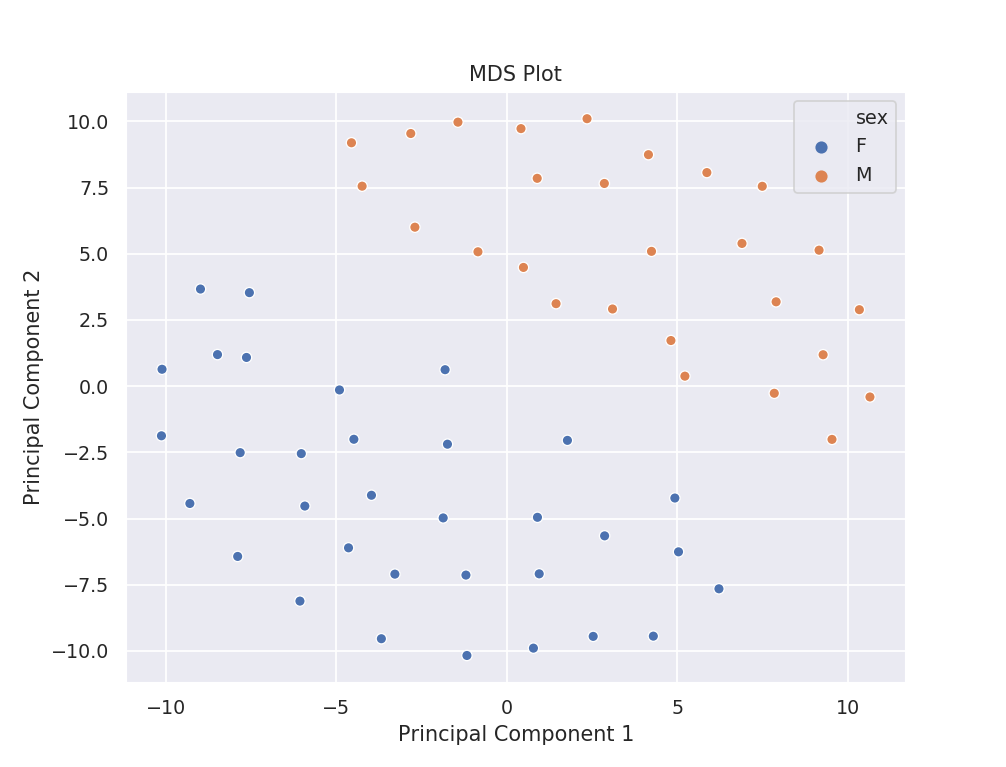

In [94]:
#### MDS plot to see interrelations of the data
#### analysis the loaded RGset and plots the beta values obtained via the getBeta() minfi package function
###dataframe=dataframe,pheno=pandas2ri.ri2py(preproidat.pheno),
%matplotlib notebook
preproidat.plt_mds(top=1000, n_components=2, group='sex', components=(0,1))

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



<IPython.core.display.Javascript object>


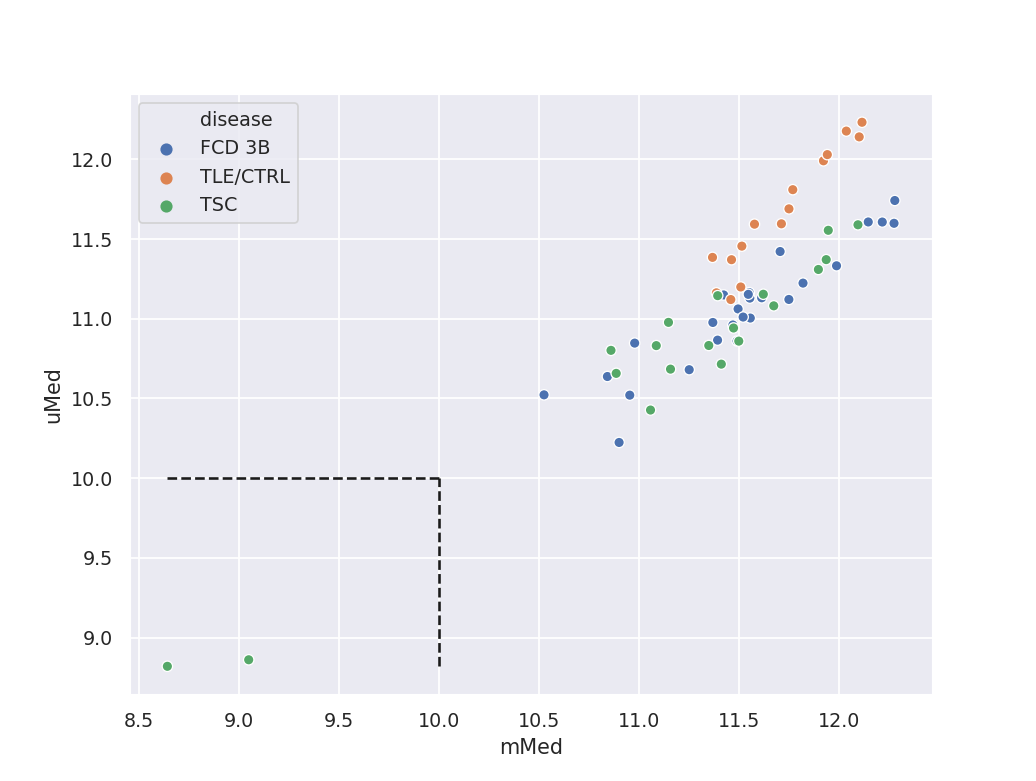

In [9]:
%matplotlib notebook
#thresh=12
preproidat.plt_mu(hue='disease', thresh=10)     

<IPython.core.display.Javascript object>


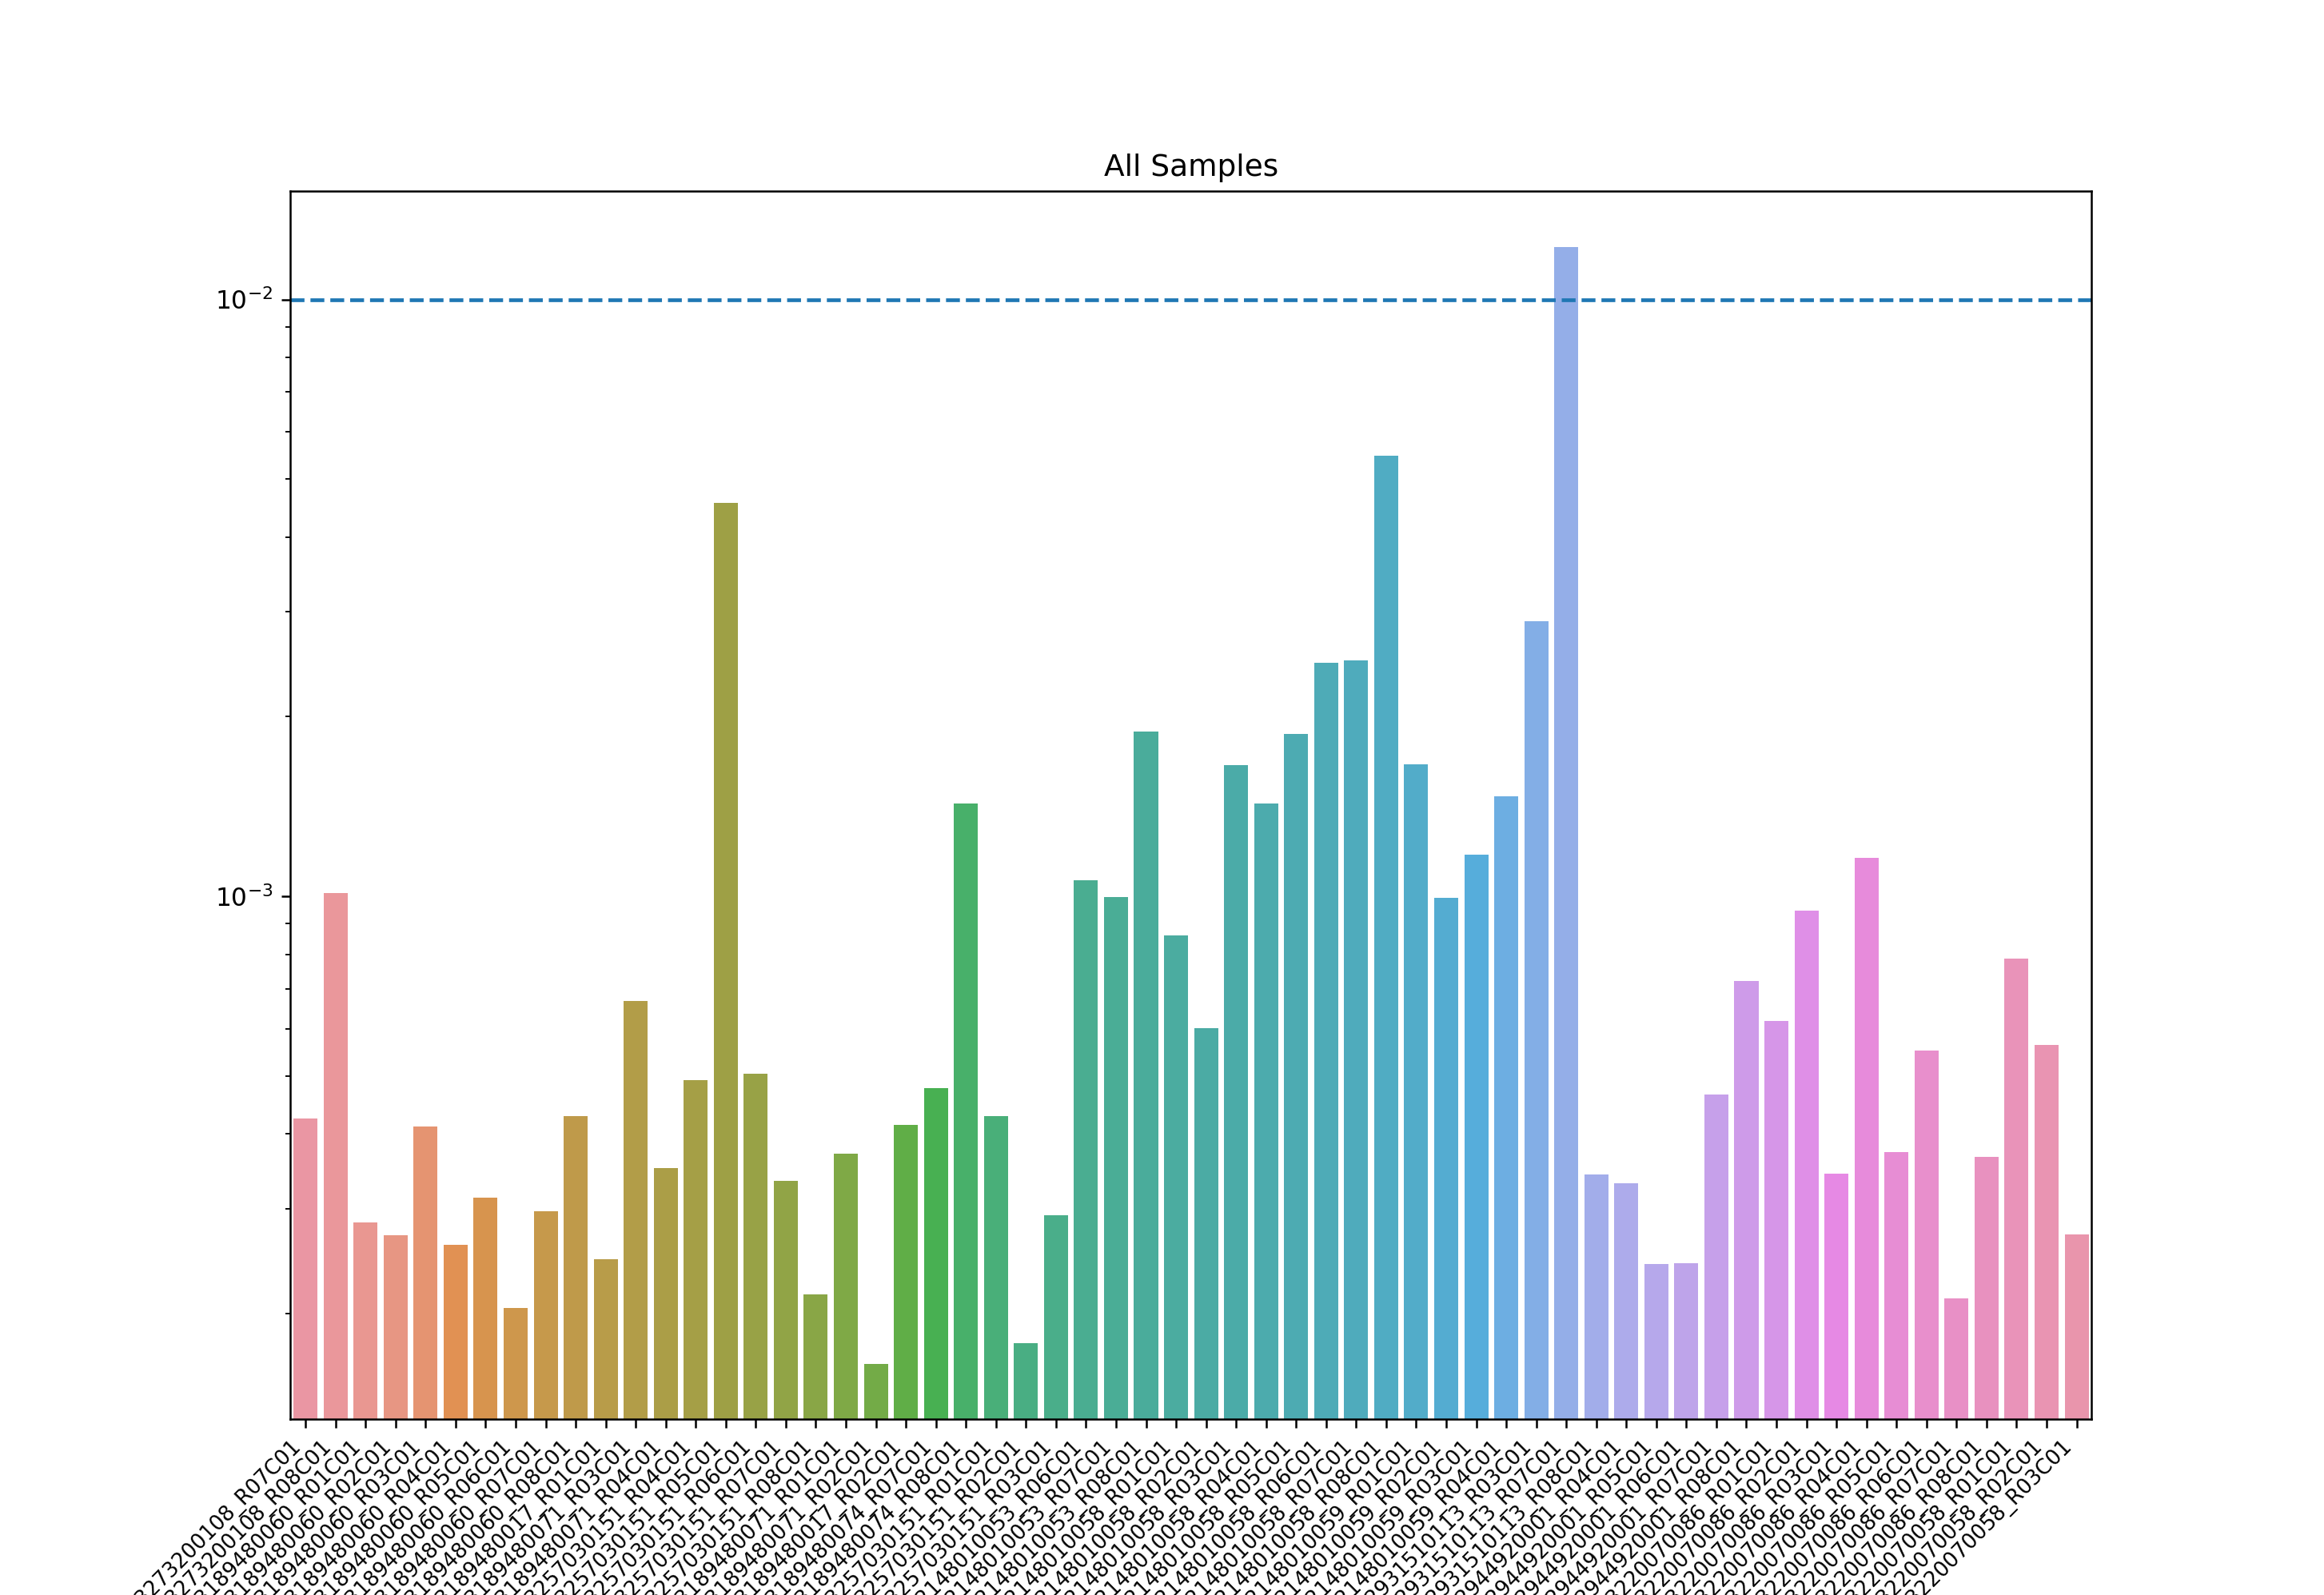

In [17]:
# examine mean detection p-values across all samples to identify any failed samples
%matplotlib notebook
###########to_do##############
preproidat.plt_meandetP(detPcut=0.01, SampleCutoff=0.1, log_scale=True, plot='all')

In [18]:
mvals_raw,mvals= preproidat.getM(preproidat.RGset)
betas_raw,betas= preproidat.getBeta(preproidat.RGset)

<IPython.core.display.Javascript object>


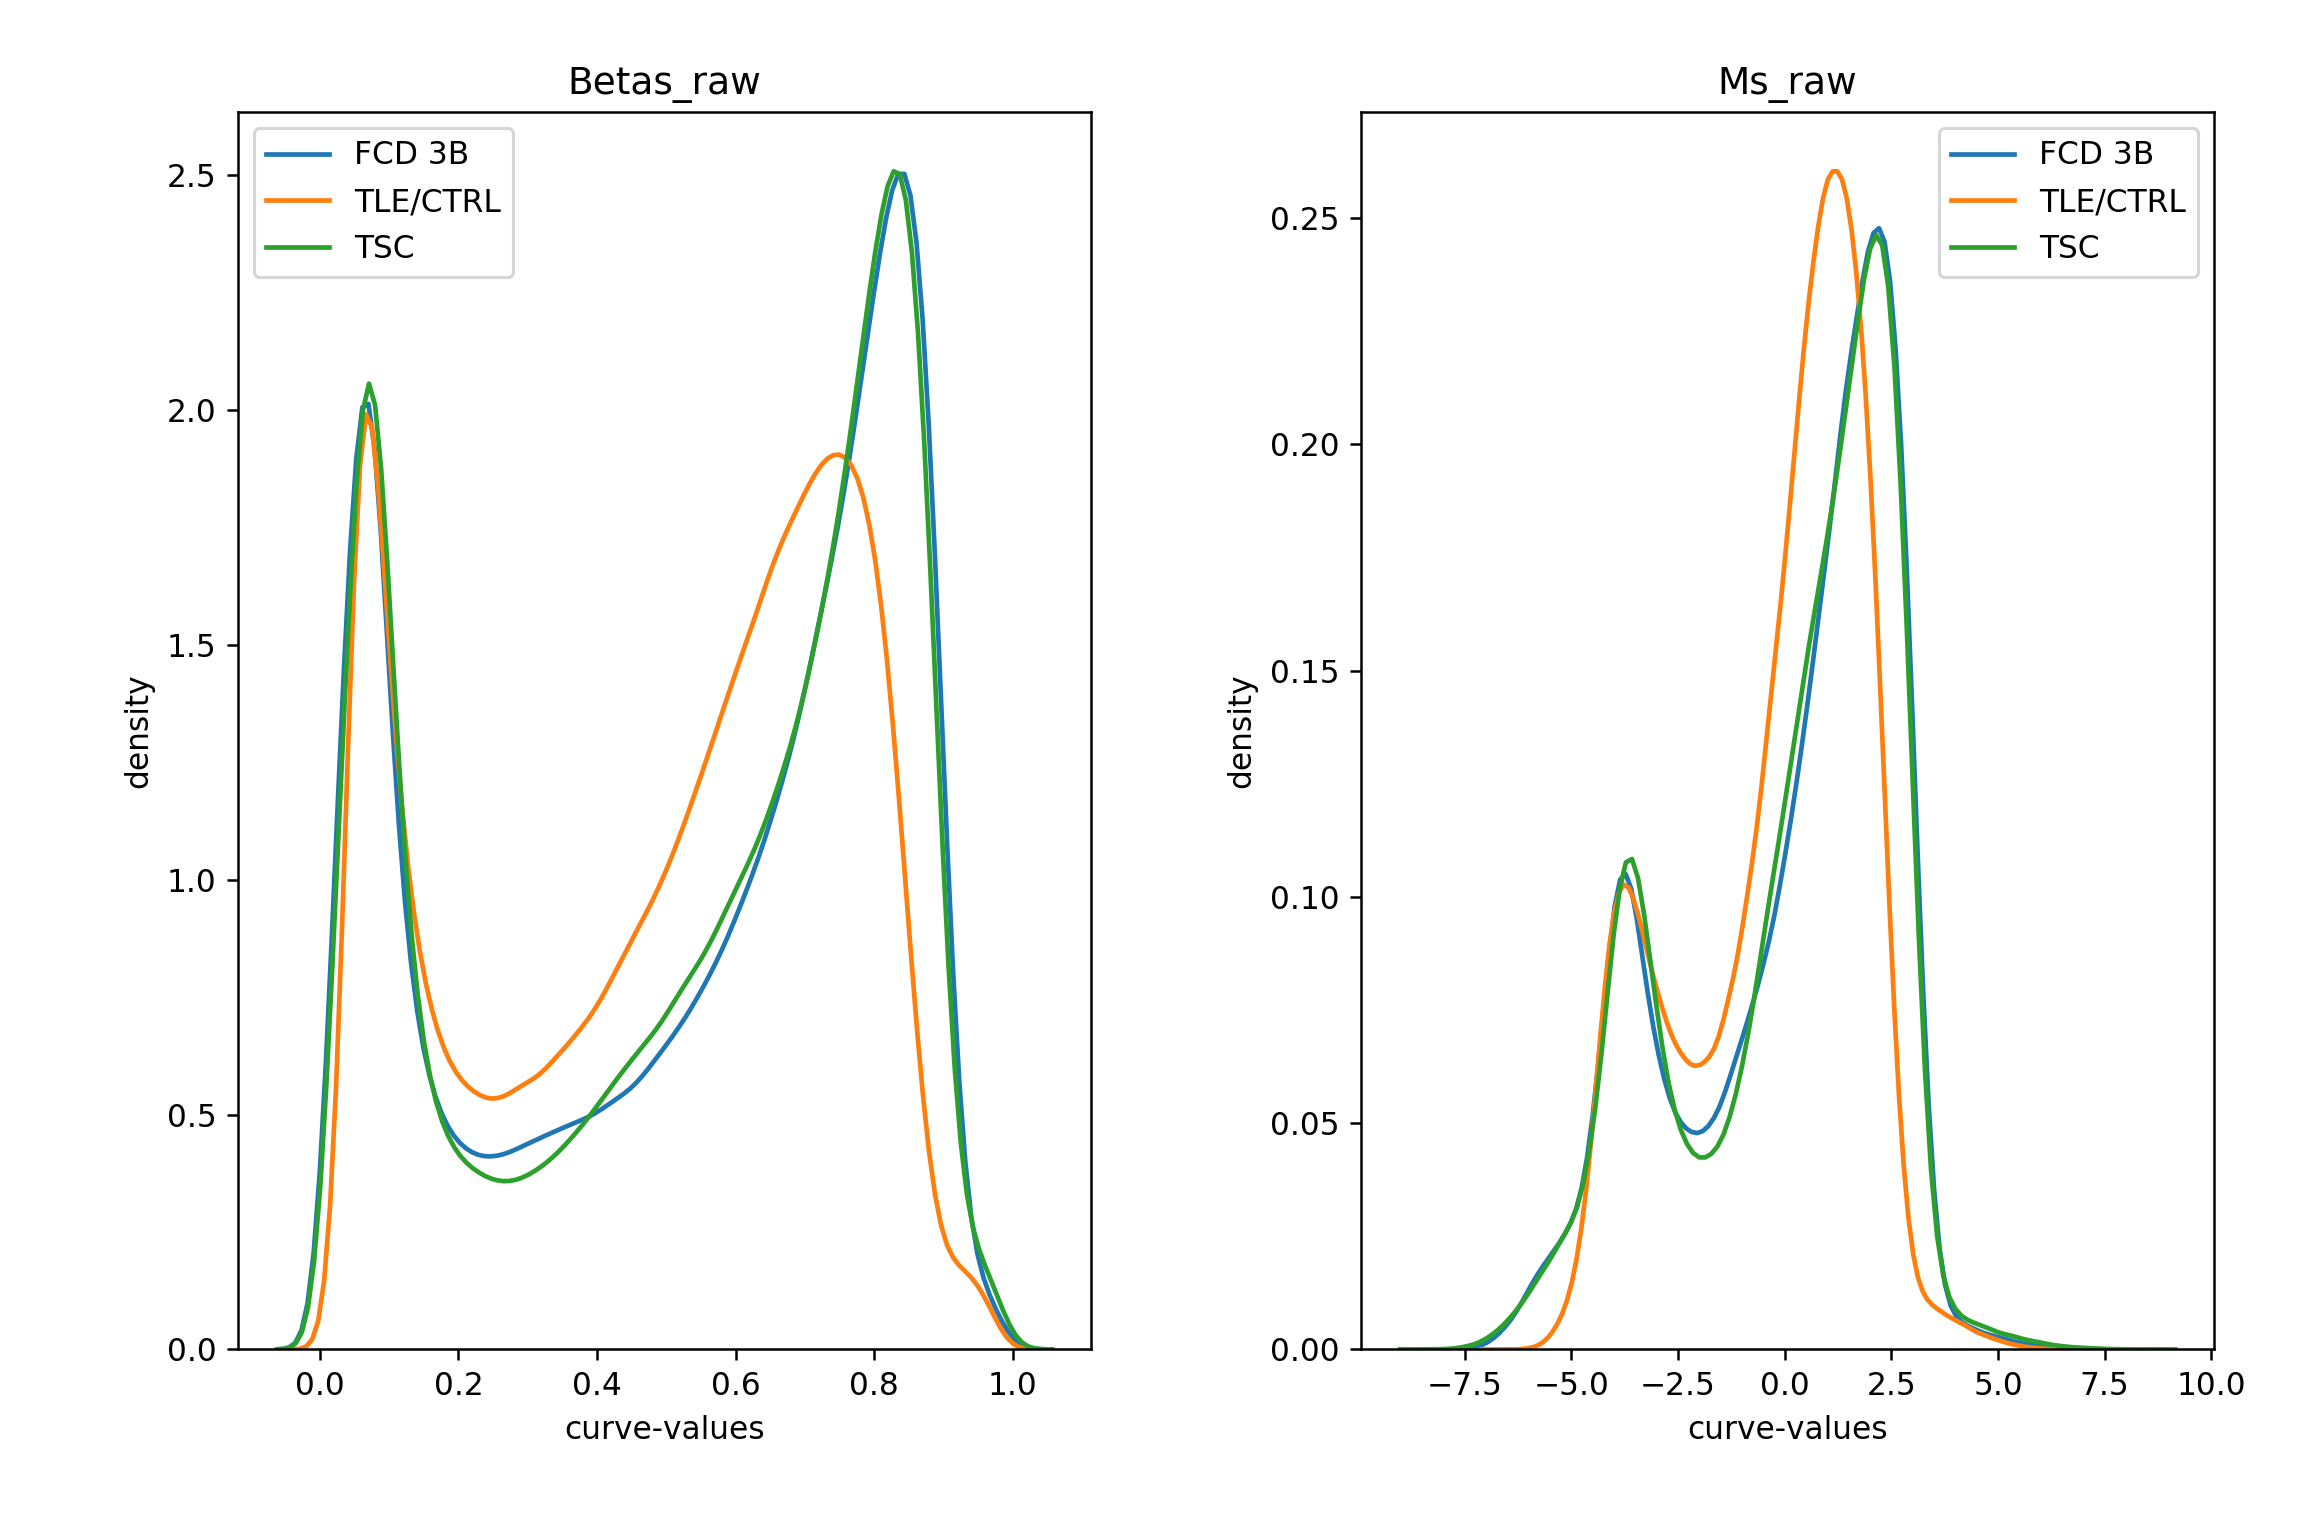

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning:

invalid value encountered in reduce



In [19]:
%matplotlib notebook
preproidat.plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw}, variant="grouped", group_by='disease', nrows=1)

<IPython.core.display.Javascript object>


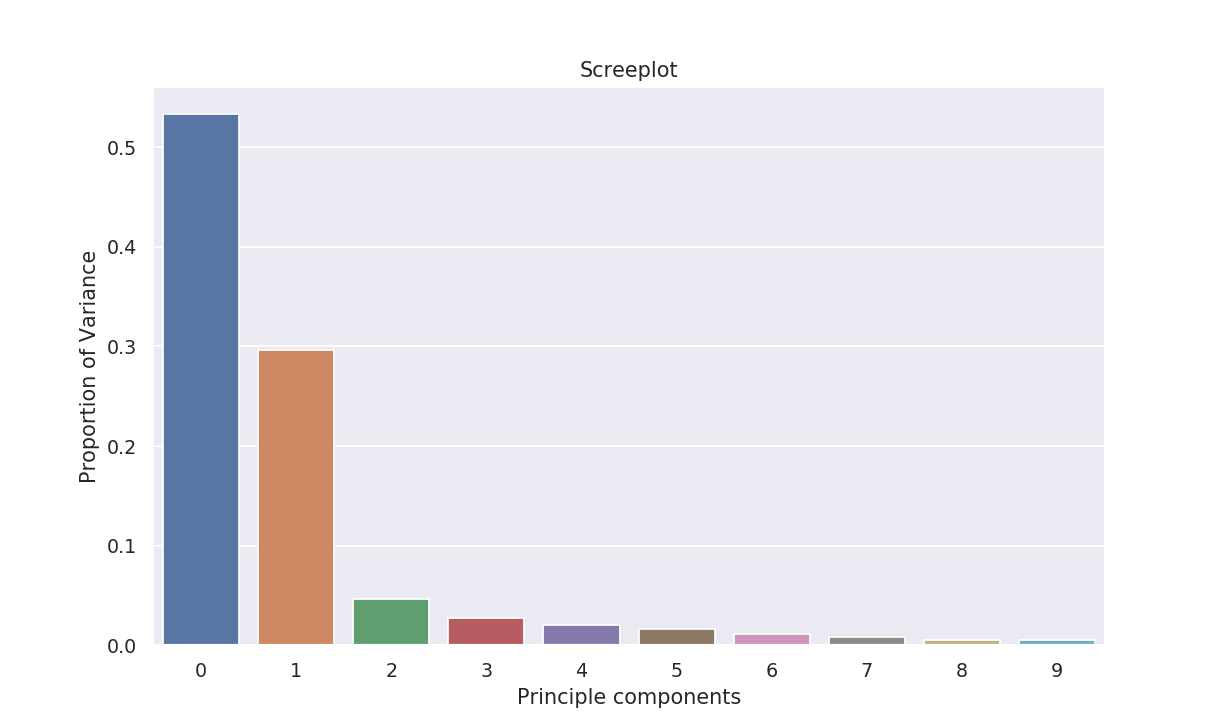

In [50]:
%matplotlib notebook
preproidat.screeplot(RGset=preproidat.RGset, nmax=10)

## Normalizing data

In [ ]:
grset,pheno=preproidat.preprocessQuantile(celltype_adoption=True, use_cell_count2=False, RGset=preproidat.RGset)

In [6]:
#grset=preproidat.preprocessFunnorm(celltype_adoption=True, use_cell_count2=False, nPCs=6)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylation450kmanifest


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylationEPICmanifest


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Combining user data with reference (flow sorted) data.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[estimateCellCounts] Processing user and reference data together.



/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

[preprocessFunnorm] Background and dye bias correction with noob


/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Loading required package: IlluminaHumanMethylation450kanno.ilmn12.hg19


/opt/conda/lib/python3.7/site-packages/rpy

In [16]:
pheno=pandas2ri.ri2py(robjects.r['as'](preproidat.pheno,'data.frame'));pheno

age_onset  age_surgery                                           Basename  \
0         3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
1        11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
2         NaN         32.0  /home/Deep_Learner/private/network/Methyl_Arra...   
3        20.0         30.0  /home/Deep_Learner/private/network/Methyl_Arra...   
4         NaN         67.0  /home/Deep_Learner/private/network/Methyl_Arra...   
5         NaN         23.0  /home/Deep_Learner/private/network/Methyl_Arra...   
6         NaN         44.0  /home/Deep_Learner/private/network/Methyl_Arra...   
7        44.0         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
8         NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
9        27.0         31.0  /home/Deep_Learner/private/network/Methyl_Arra...   
10       29.0         41.0  /home/Deep_Learner/private/network/Methyl_Arra...   
11       25.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
12       11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
13        NaN         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
14        NaN          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
15        NaN          7.0  /home/Deep_Learner/private/network/Methyl_Arra...   
16        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
17        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
18        NaN         14.0  /home/Deep_Learner/private/network/Methyl_Arra...   
19        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
20        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
21        NaN         24.0  /home/Deep_Learner/private/network/Methyl_Arra...   
22        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
23        NaN         22.0  /home/Deep_Learner/private/network/Methyl_Arra...   
24        NaN         18.0  /home/Deep_Learner/private/network/Methyl_Arra...   
25        NaN         66.0  /home/Deep_Learner/private/network/Methyl_Arra...   
26        6.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
27        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
28        2.0         19.0  /home/Deep_Learner/private/network/Methyl_Arra...   
29        6.0         50.0  /home/Deep_Learner/private/network/Methyl_Arra...   
30       27.0         43.0  /home/Deep_Learner/private/network/Methyl_Arra...   
31        4.0         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
32        3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
33        1.0         55.0  /home/Deep_Learner/private/network/Methyl_Arra...   
34        0.6         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
35        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
36        5.0         68.0  /home/Deep_Learner/private/network/Methyl_Arra...   
37        NaN         40.0  /home/Deep_Learner/private/network/Methyl_Arra...   
38        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
39        NaN         33.0  /home/Deep_Learner/private/network/Methyl_Arra...   
40        1.0         48.0  /home/Deep_Learner/private/network/Methyl_Arra...   
41        0.0         13.0  /home/Deep_Learner/private/network/Methyl_Arra...   
42        0.0          8.0  /home/Deep_Learner/private/network/Methyl_Arra...   
43        0.0          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
44        0.0          2.0  /home/Deep_Learner/private/network/Methyl_Arra...   
45        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
46        0.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
47        0.0          5.0  /home/Deep_Learner/private/network/Methyl_Arra...   
48        0.0          4.0  /home/D

## Filtering of probes and samples 

### DNAmArray Pipeline

In [ ]:
beta_py, mval_py, pheno_py=preproidat.DNAmArray_processing(GRset=grset, RGset=preproidat.RGset_orig, filterXY=True, filterNoCG=True, 
                     excludeXreactiveprobes=True, dropSnPs=True, cutbead=3, zeropoint=False, 
                     what="both", SampleCutoff=0.7, ProbeCutoff=0.6, array_type='EPIC', badSampleCutoff=10, 
                     rm_badsamples=True, detPFilter=False, detPcut=0.01, 
                     addQC=False, autoimpute=True, verbose=True, imputation_method="imputePCA", beadCutoff=1)

In [37]:
pheno_py

age_onset  age_surgery                                           Basename  \
0         3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
1        11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
2        25.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
3        11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
4         NaN         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
5         NaN          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
6         NaN          7.0  /home/Deep_Learner/private/network/Methyl_Arra...   
7         NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
8         NaN         14.0  /home/Deep_Learner/private/network/Methyl_Arra...   
9         NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
10        NaN         24.0  /home/Deep_Learner/private/network/Methyl_Arra...   
11        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
12        NaN         22.0  /home/Deep_Learner/private/network/Methyl_Arra...   
13        NaN         18.0  /home/Deep_Learner/private/network/Methyl_Arra...   
14        NaN         66.0  /home/Deep_Learner/private/network/Methyl_Arra...   
15        6.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
16        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
17        2.0         19.0  /home/Deep_Learner/private/network/Methyl_Arra...   
18        6.0         50.0  /home/Deep_Learner/private/network/Methyl_Arra...   
19       27.0         43.0  /home/Deep_Learner/private/network/Methyl_Arra...   
20        4.0         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
21        3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
22        1.0         55.0  /home/Deep_Learner/private/network/Methyl_Arra...   
23        0.6         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
24        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
25        5.0         68.0  /home/Deep_Learner/private/network/Methyl_Arra...   
26        NaN         40.0  /home/Deep_Learner/private/network/Methyl_Arra...   
27        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
28        NaN         33.0  /home/Deep_Learner/private/network/Methyl_Arra...   
29        1.0         48.0  /home/Deep_Learner/private/network/Methyl_Arra...   
30        0.0          8.0  /home/Deep_Learner/private/network/Methyl_Arra...   
31        0.0          2.0  /home/Deep_Learner/private/network/Methyl_Arra...   
32        0.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
33        0.0          6.0  /home/Deep_Learner/private/network/Methyl_Arra...   
34        0.0          3.0  /home/Deep_Learner/private/network/Methyl_Arra...   
35        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
36        0.0          3.0  /home/Deep_Learner/private/network/Methyl_Arra...   
37        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
38        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   

         Batchnum  duration duration_group            diagnosis center  \
0   b203273200108      25.0          20-50     FCD 3B CD34in WM   UKER   
1   b203273200108       0.0            1-5     FCD 3B CD34in WM   UKER   
2   b203189480071       3.0            1-5     FCD 3B CD34in WM   UKER   
3   b203189480071       0.0            1-5     FCD 3B CD34in WM   UKER   
4   b203257030151       NaN                            GG CD34-   UKER   
5   b203257030151       NaN                            GG CD34-    VGT   
6   b203257030151       NaN                            GG CD34-    VGT   
7   b203257030151       NaN                            GG CD34-    VGT   
8   b203189480071       NaN                            GG CD34-   Mara   
9   b203189480071      

In [38]:
mval_py.isnull().sum()

FCD 3B.203273200108_R07C01      0
FCD 3B.203273200108_R08C01      0
FCD 3B.203189480071_R03C01      0
FCD 3B.203189480071_R04C01      0
FCD 3B.203257030151_R04C01      0
FCD 3B.203257030151_R05C01      0
FCD 3B.203257030151_R06C01      0
FCD 3B.203257030151_R07C01      0
FCD 3B.203189480071_R01C01      0
FCD 3B.203189480071_R02C01      0
FCD 3B.203189480074_R07C01      0
FCD 3B.203189480074_R08C01      0
FCD 3B.203257030151_R01C01      0
FCD 3B.203257030151_R02C01      0
FCD 3B.203257030151_R03C01      0
TLE/CTRL.202148010053_R06C01    0
TLE/CTRL.202148010053_R07C01    0
TLE/CTRL.202148010053_R08C01    0
TLE/CTRL.202148010058_R01C01    0
TLE/CTRL.202148010058_R02C01    0
TLE/CTRL.202148010058_R03C01    0
TLE/CTRL.202148010058_R04C01    0
TLE/CTRL.202148010058_R05C01    0
TLE/CTRL.202148010058_R06C01    0
TLE/CTRL.202148010058_R07C01    0
TLE/CTRL.202148010058_R08C01    0
TLE/CTRL.202148010059_R01C01    0
TLE/CTRL.202148010059_R02C01    0
TLE/CTRL.202148010059_R03C01    0
TLE/CTRL.20214

In [39]:
beta_py

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg18478105                   -3.691989                   -4.341755   
cg14361672                    2.509835                    1.642950   
cg13417420                   -4.305056                   -3.185699   
cg26724186                    3.106301                    3.056355   
cg24133276                   -3.224248                   -4.555741   
...                                ...                         ...   
cg06889756                    2.236161                    1.590761   
cg02455706                   -1.433833                   -0.800577   
cg14585103                    2.473669                    1.703491   
cg10633746                   -3.730023                   -3.045562   
cg12623625                    1.871905                    1.143267   

            FCD 3B.203189480071_R03C01  FCD 3B.203189480071_R04C01  \
cg18478105                   -3.503328                   -3.769507   
cg14361672                    1.613224                    1.488977   
cg13417420                   -3.403619                   -2.664677   
cg26724186                    3.108648                    3.029019   
cg24133276                   -2.686008                   -3.472488   
...                                ...                         ...   
cg06889756                    1.448816                    1.898305   
cg02455706                   -2.021062                   -0.672576   
cg14585103                    2.147893                    2.178841   
cg10633746                   -3.459226                   -3.552159   
cg12623625                    1.669388                    1.354490   

            FCD 3B.203257030151_R04C01  FCD 3B.203257030151_R05C01  \
cg18478105                   -3.263819                   -3.684760   
cg14361672                    1.555835                    1.179364   
cg13417420                   -3.825491                   -4.149810   
cg26724186                    2.843405                    3.362241   
cg24133276                   -3.184362                   -3.588830   
...                                ...                         ...   
cg06889756                    1.872899                    1.370443   
cg02455706                   -1.853625                   -1.616605   
cg14585103                    1.929154                    2.042573   
cg10633746                   -3.755894                   -2.054126   
cg12623625                    0.932529                    2.448986   

            FCD 3B.203257030151_R06C01  FCD 3B.203257030151_R07C01  \
cg18478105                   -3.241655                   -3.353125   
cg14361672                    2.215507                    2.215457   
cg13417420                   -4.740577                   -3.944629   
cg26724186                    2.987967                    3.188506   
cg24133276                   -4.143082                   -3.236990   
...                                ...                         ...   
cg06889756                    1.806731                    1.670823   
cg02455706                   -1.760269                   -2.282938   
cg14585103                    2.107103                    2.499132   
cg10633746                   -3.581282                   -2.632932   
cg12623625                    1.807909                    2.150158   

            FCD 3B.203189480071_R01C01  FCD 3B.203189480071_R02C01  ...  \
cg18478105                   -3.681103                   -3.452079  ...   
cg14361672                    2.039275                    1.146364  ...   
cg13417420                   -4.700258                   -4.115571  ...   
cg26724186                    3.463381                    3.290138  ...   
cg24133276                   -3.601144                   -3.158947  ...   
...                                ...                         ...  ...   
cg06889756                    0.858920                    1.035874  ...   
cg02455706                   -2.292093          

<IPython.core.display.Javascript object>


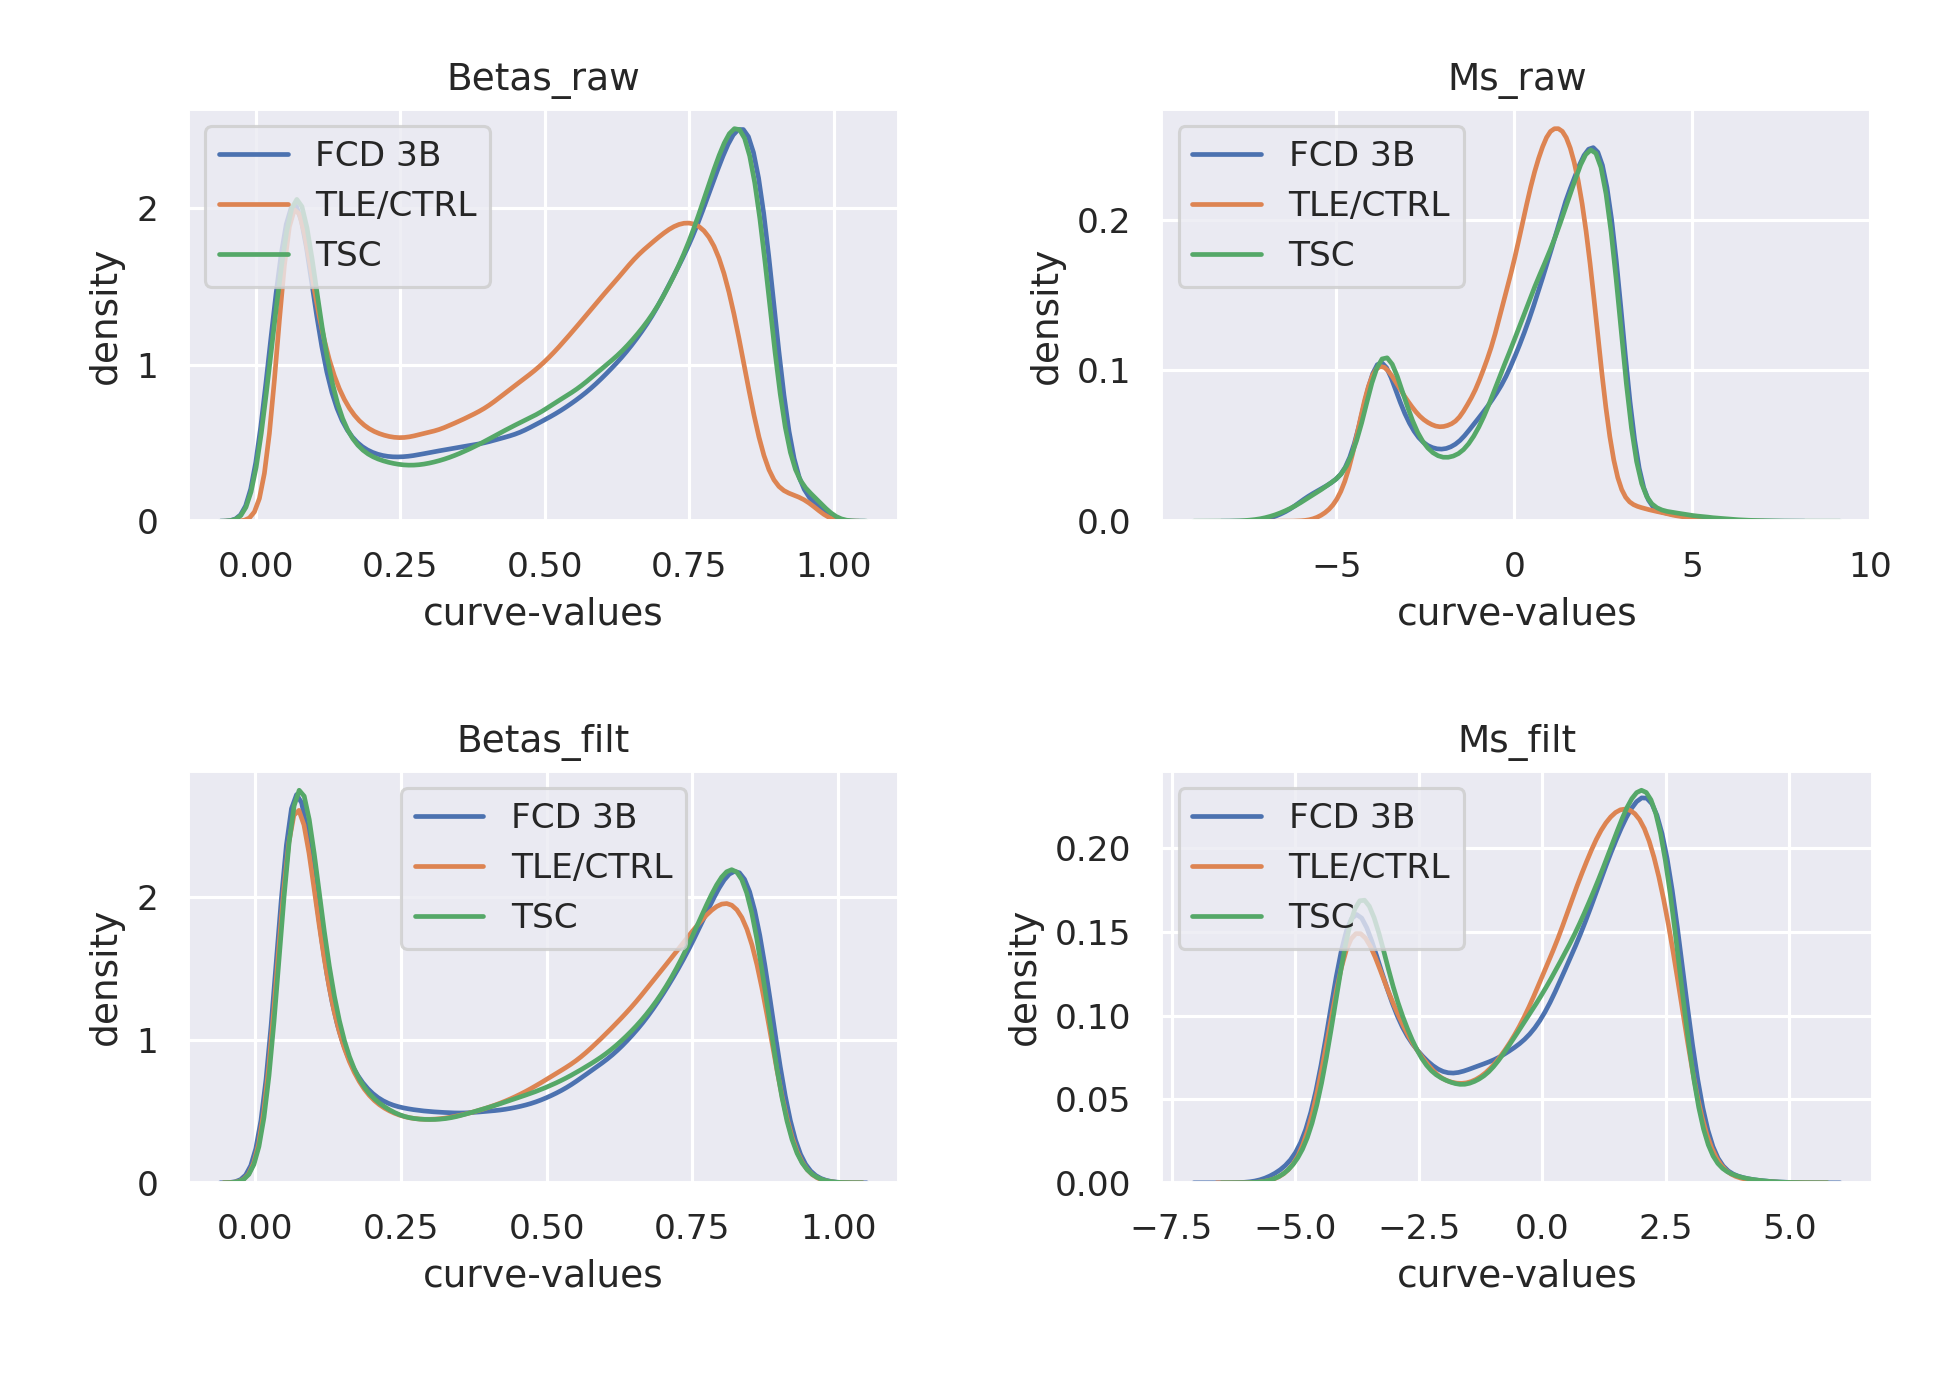

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning:

invalid value encountered in reduce



In [140]:
## visualise what the data looks like before and after normalisation
%matplotlib notebook
preproidat.plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw,'Betas_filt':preproidat.beta_py,'Ms_filt':preproidat.mval_py}, variant="grouped", group_by='disease', nrows=2)

<IPython.core.display.Javascript object>


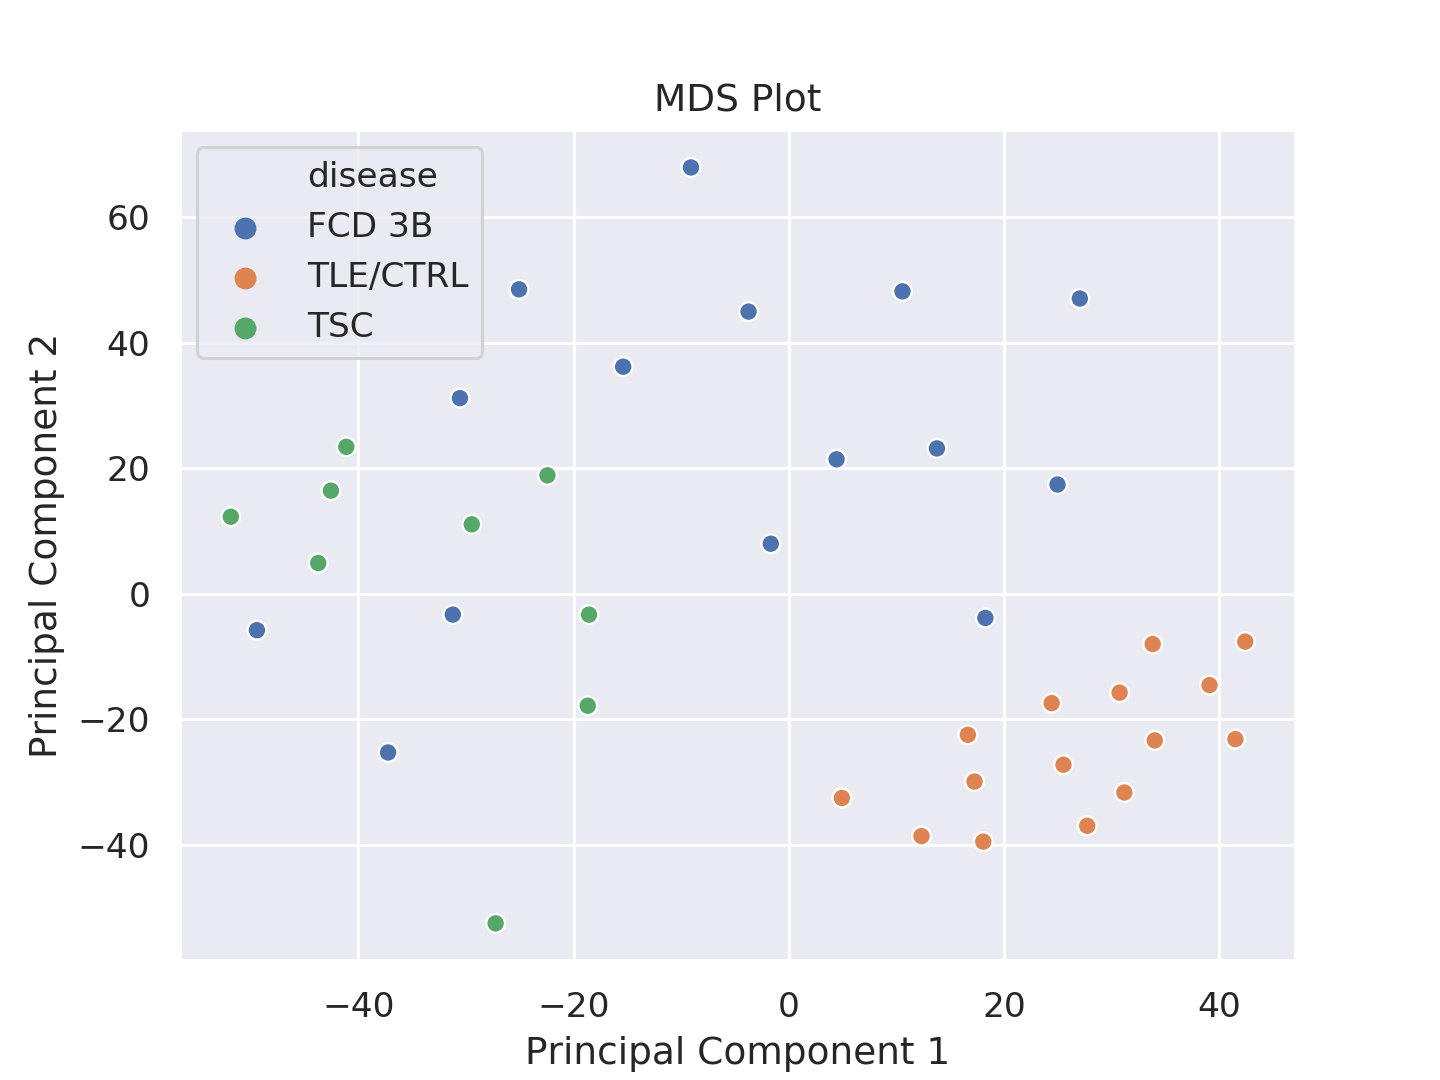

In [40]:
%matplotlib notebook
preproidat.plt_mds(dataframe=preproidat.mval_py, pheno=preproidat.pheno_py, n_components=2, group='disease', components=(0,1)) 

<IPython.core.display.Javascript object>


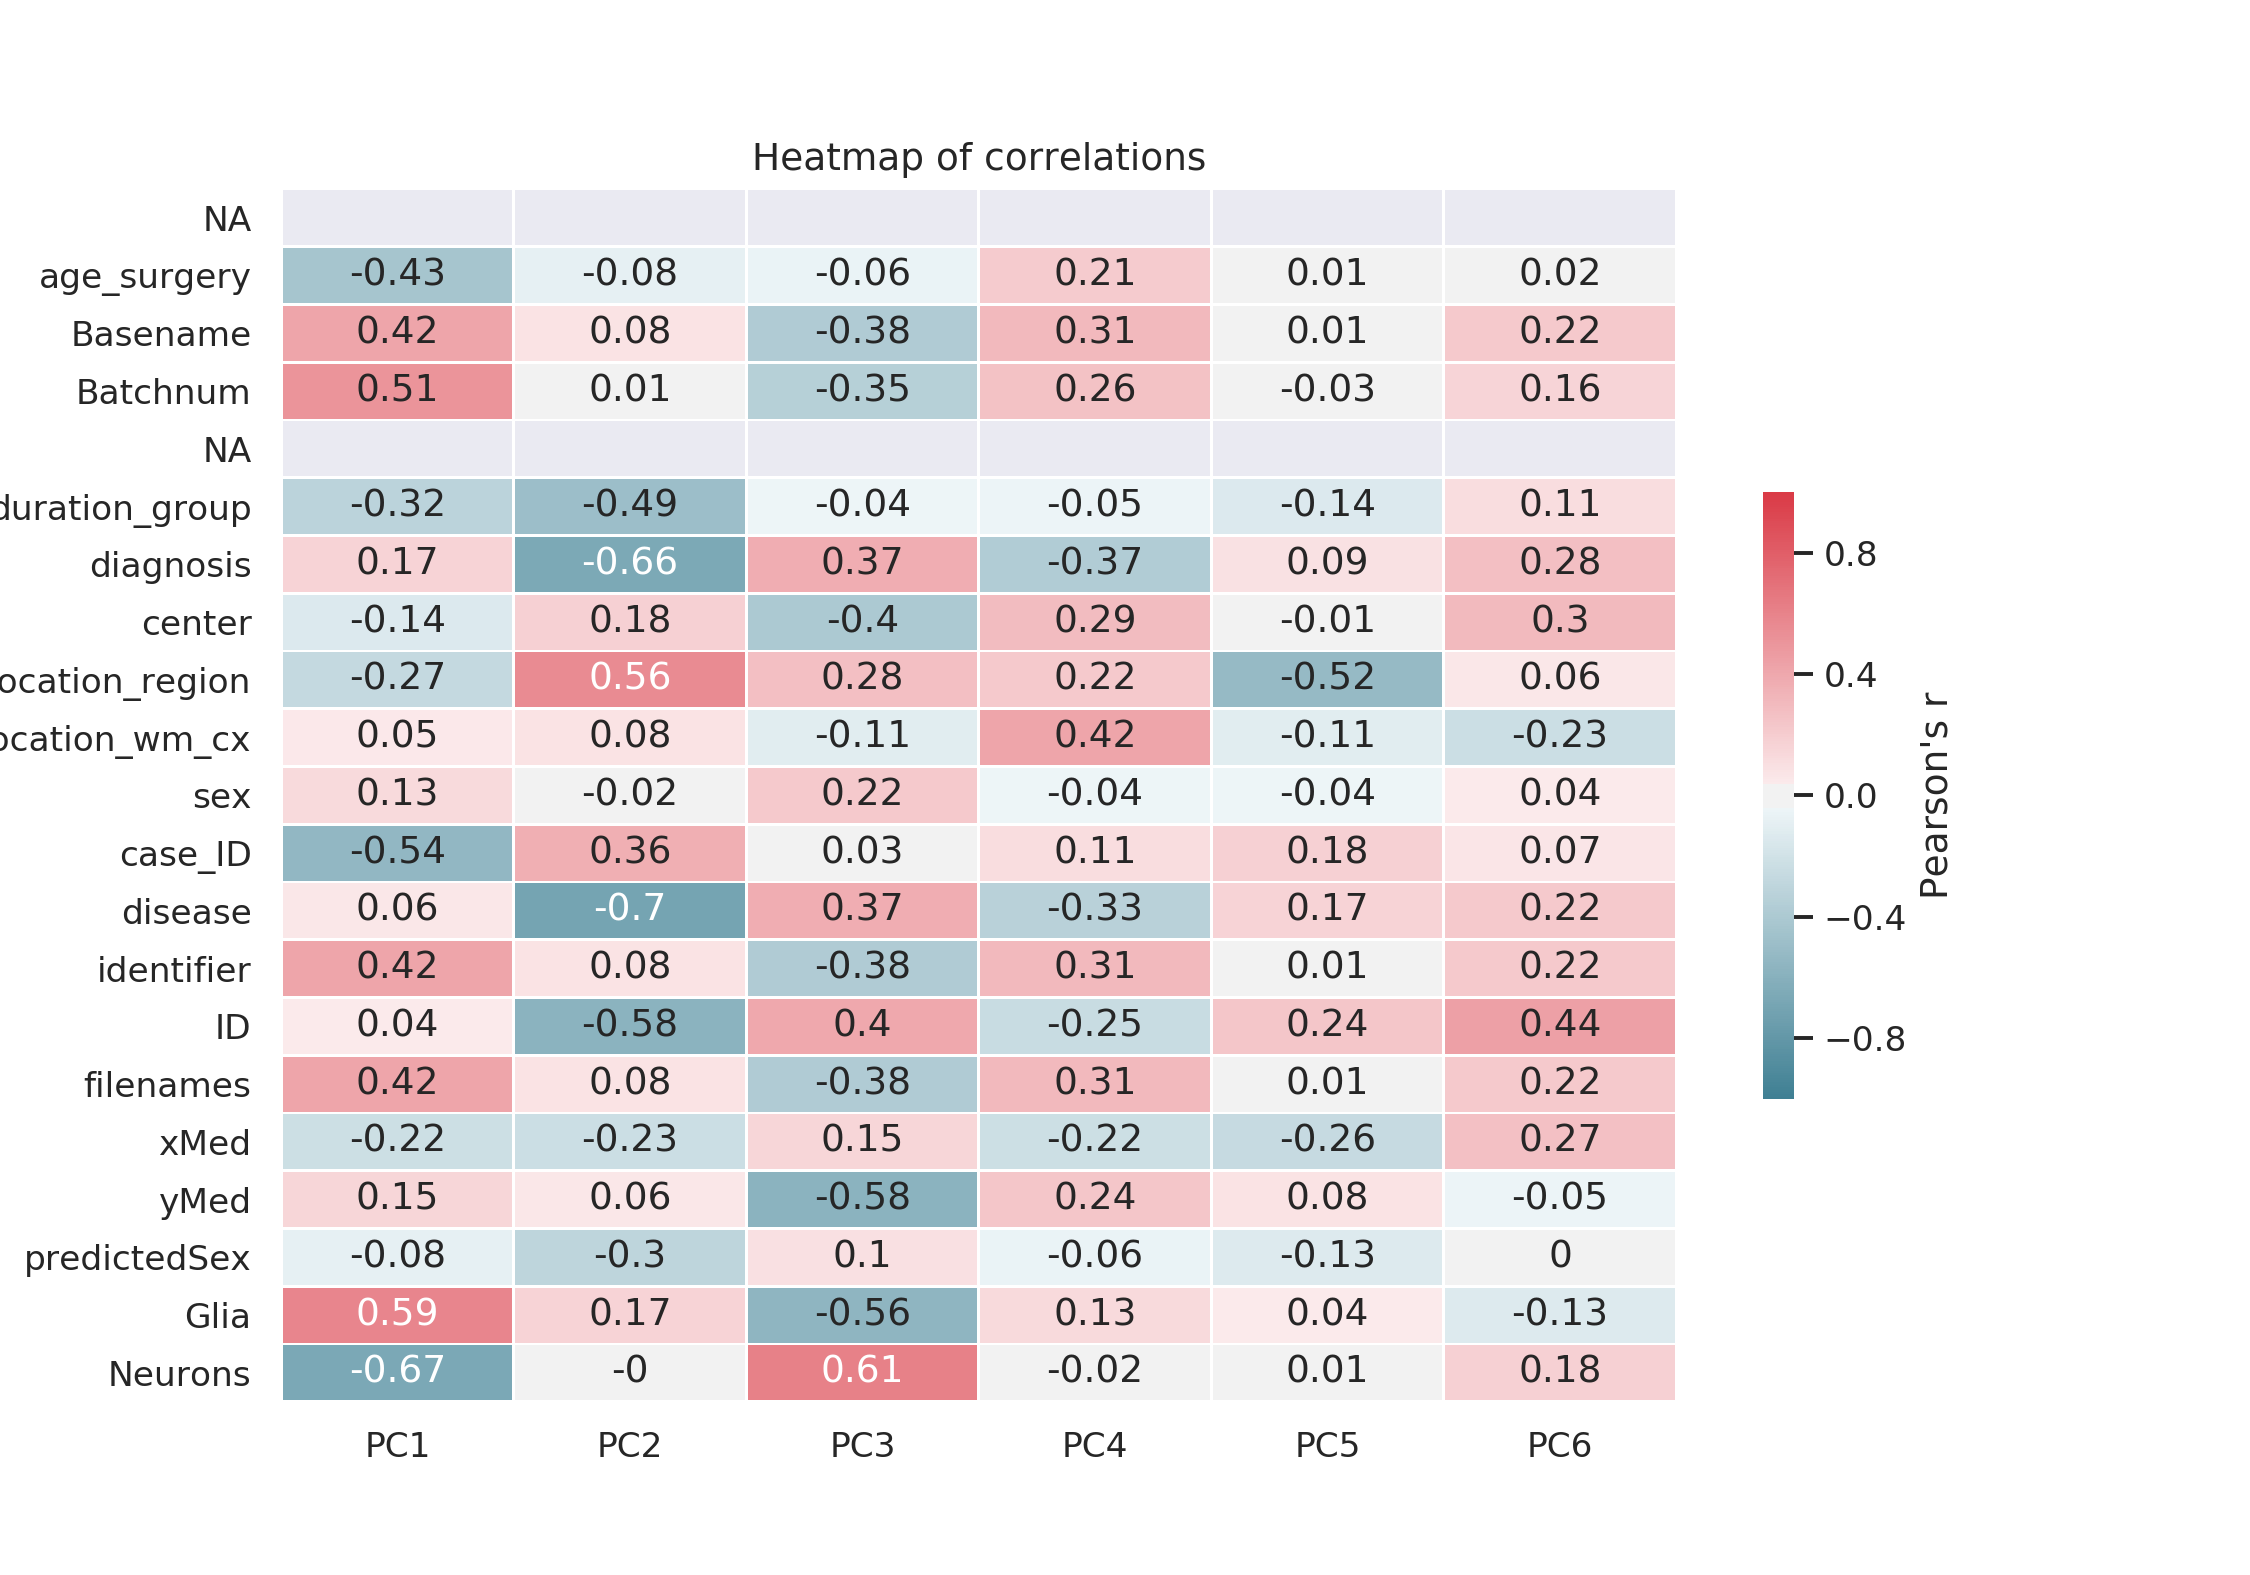

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:972: RuntimeWarning:

invalid value encountered in subtract



In [14]:
%matplotlib notebook
preproidat.plt_covariates(matrix=preproidat.mval, pheno=preproidat.pheno, pcs=6)

In [41]:
preproidat.dmp_finder(matrix=preproidat.mval, 
                      pheno=preproidat.pheno, 
                      phenotype='disease',
                      #adjust_vars=['age_surgery'],
                      #correction_vars=['location_region', 'sex'],#,,'location_region', location_wm_cx'
                      useCombat=False,
                      #sva=True,
                      number=100, 
                      pvalue=0.01, 
                      adjpval=1,
                      save_csv=False,
                      path=None)

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



These are the possible pairwise groups for your comparisons 
 {1: 'FCD 3B-TLE/CTRL', 2: 'FCD 3B-TSC', 3: 'TLE/CTRL-TSC'}
Enter your comparison of choice;- to get all comparisons type "all":
all
you selected all
You are adjusting for these variables: []
You are correcting for these variables: []
creating model
~0 + disease

<environment: 0x55d2f1d28300>

Creating contrast matrix for experiment
Computing statistics for experiment
Aligning annotation
Computing contrasts for experiment
done


In [43]:
preproidat.dectest

diseaseFCD.3B-diseaseTLE.CTRL  diseaseFCD.3B-diseaseTSC  \
Down                          35726.0                   11544.0   
NotSig                       381602.0                  428134.0   
Up                            33482.0                   11132.0   

        diseaseTLE.CTRL-diseaseTSC  
Down                       48746.0  
NotSig                    357233.0  
Up                         44831.0

In [44]:
mval_10000=preproidat.mval_py.loc[preproidat.dmps]; mval_10000

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg00590630                   -3.018840                   -2.141279   
cg08416194                   -2.911304                   -3.310606   
cg26154808                   -2.990247                   -2.545884   
cg22437153                   -2.239206                   -2.402076   
cg00734592                   -2.669540                   -2.433593   
...                                ...                         ...   
cg25632692                    2.333168                    2.356339   
cg09916783                    0.867512                    0.846568   
cg09723136                   -0.393814                    0.070911   
cg07177559                   -2.400936                   -2.839083   
cg02030908                   -0.251145                    0.489739   

            FCD 3B.203189480071_R03C01  FCD 3B.203189480071_R04C01  \
cg00590630                   -4.252307                   -2.518609   
cg08416194                   -3.455255                   -2.957502   
cg26154808                   -2.818904                   -3.535013   
cg22437153                   -3.710983                   -3.417060   
cg00734592                   -3.984376                   -3.326361   
...                                ...                         ...   
cg25632692                    2.508962                    2.426564   
cg09916783                    0.799552                    0.786429   
cg09723136                   -1.073173                    0.514514   
cg07177559                   -2.961640                   -3.263611   
cg02030908                    0.106553                    0.310810   

            FCD 3B.203257030151_R04C01  FCD 3B.203257030151_R05C01  \
cg00590630                   -4.075562                   -3.070661   
cg08416194                   -2.782669                   -2.584056   
cg26154808                   -3.526832                   -2.530327   
cg22437153                   -3.170114                   -2.737612   
cg00734592                   -4.280804                   -4.131174   
...                                ...                         ...   
cg25632692                    3.143374                    2.362653   
cg09916783                    0.543914                    1.390718   
cg09723136                    0.335887                    0.225865   
cg07177559                   -3.742630                   -2.917004   
cg02030908                    0.762761                   -0.117052   

            FCD 3B.203257030151_R06C01  FCD 3B.203257030151_R07C01  \
cg00590630                   -3.501803                   -4.026503   
cg08416194                   -2.626841                   -2.770879   
cg26154808                   -3.433611                   -3.478763   
cg22437153                   -3.763705                   -3.708714   
cg00734592                   -3.924131                   -4.260968   
...                                ...                         ...   
cg25632692                    2.619214                    2.679247   
cg09916783                    0.564811                    0.662543   
cg09723136                   -0.168366                    0.295074   
cg07177559                   -3.412048                   -3.649964   
cg02030908                    0.202999                    0.174697   

            FCD 3B.203189480071_R01C01  FCD 3B.203189480071_R02C01  ...  \
cg00590630                   -4.099821                   -2.999545  ...   
cg08416194                   -3.433873                   -3.344296  ...   
cg26154808                   -3.519623                   -3.530650  ...   
cg22437153                   -3.558301                   -3.515034  ...   
cg00734592                   -3.846610                   -3.322906  ...   
...                                ...                         ...  ...   
cg25632692                    3.168263                    3.009993  ...   
cg09916783                   -0.822447          

In [45]:
beta_10000=preproidat.beta_py.loc[preproidat.dmps];beta_10000

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg00590630                    0.109828                    0.184791   
cg08416194                    0.117330                    0.091560   
cg26154808                    0.111781                    0.146206   
cg22437153                    0.174783                    0.159093   
cg00734592                    0.135828                    0.156192   
...                                ...                         ...   
cg25632692                    0.834413                    0.836620   
cg09916783                    0.645957                    0.642630   
cg09723136                    0.432178                    0.512286   
cg07177559                    0.159199                    0.122614   
cg02030908                    0.456589                    0.584060   

            FCD 3B.203189480071_R03C01  FCD 3B.203189480071_R04C01  \
cg00590630                    0.049856                    0.148582   
cg08416194                    0.083555                    0.114054   
cg26154808                    0.124127                    0.079418   
cg22437153                    0.070945                    0.085604   
cg00734592                    0.059426                    0.090655   
...                                ...                         ...   
cg25632692                    0.850570                    0.843165   
cg09916783                    0.635111                    0.633001   
cg09723136                    0.322159                    0.588225   
cg07177559                    0.113764                    0.094306   
cg02030908                    0.518456                    0.553652   

            FCD 3B.203257030151_R04C01  FCD 3B.203257030151_R05C01  \
cg00590630                    0.055990                    0.106365   
cg08416194                    0.126884                    0.142934   
cg26154808                    0.079833                    0.147557   
cg22437153                    0.099988                    0.130384   
cg00734592                    0.048929                    0.053987   
...                                ...                         ...   
cg25632692                    0.898331                    0.837217   
cg09916783                    0.593152                    0.723916   
cg09723136                    0.557943                    0.539060   
cg07177559                    0.069513                    0.116921   
cg02030908                    0.629181                    0.479727   

            FCD 3B.203257030151_R06C01  FCD 3B.203257030151_R07C01  \
cg00590630                    0.081117                    0.057815   
cg08416194                    0.139339                    0.127792   
cg26154808                    0.084711                    0.082315   
cg22437153                    0.068574                    0.071049   
cg00734592                    0.061803                    0.049572   
...                                ...                         ...   
cg25632692                    0.860025                    0.864960   
cg09916783                    0.596643                    0.612834   
cg09723136                    0.470857                    0.550955   
cg07177559                    0.085877                    0.073784   
cg02030908                    0.535119                    0.530236   

            FCD 3B.203189480071_R01C01  FCD 3B.203189480071_R02C01  ...  \
cg00590630                    0.055108                    0.111142  ...   
cg08416194                    0.084697                    0.089636  ...   
cg26154808                    0.080201                    0.079639  ...   
cg22437153                    0.078246                    0.080436  ...   
cg00734592                    0.064993                    0.090853  ...   
...                                ...                         ...  ...   
cg25632692                    0.899896                    0.889571  ...   
cg09916783                    0.361219          

<IPython.core.display.Javascript object>


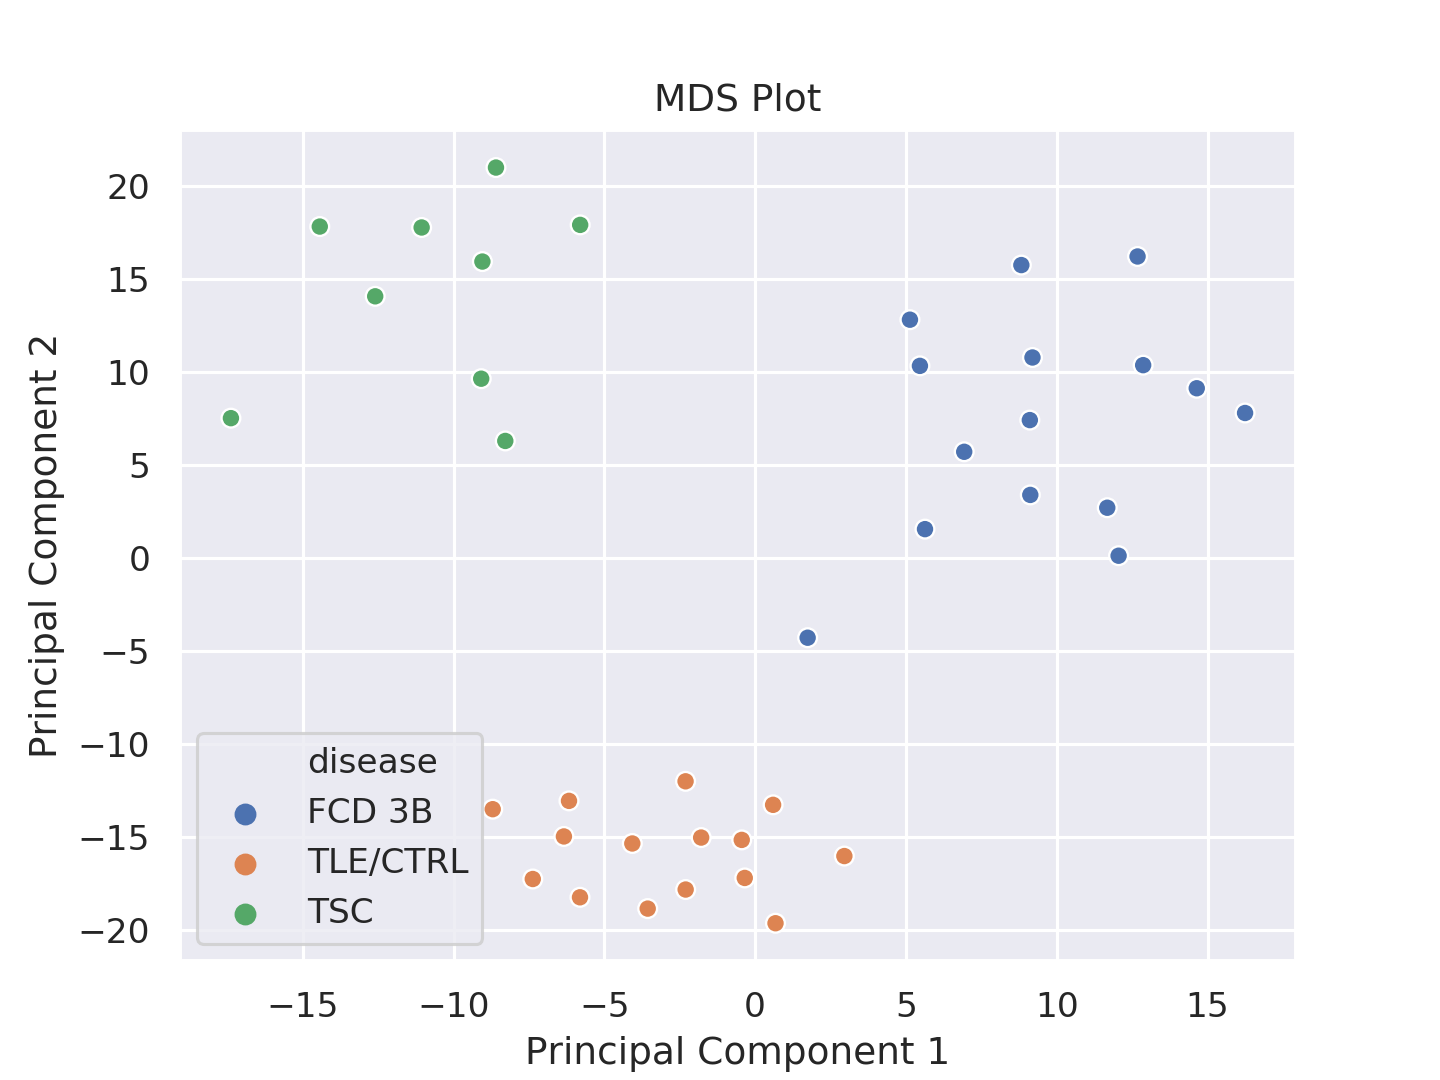

In [46]:
####quantile
%matplotlib notebook
preproidat.plt_mds(mval_10000, pheno_py, n_components=2, group='disease', components=(0,1)) 

In [48]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
to_embed=mval_10000
time_start = time.time()

mapper = umap.UMAP(n_neighbors=15,
                      min_dist=0.0,
                      n_components=2,
                      metric='correlation',
                     random_state=123,
                     spread=10
                      ).fit(to_embed.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(to_embed.transpose())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1052: RuntimeWarning:

divide by zero encountered in power



UMAP done! Time elapsed: 3.4312047958374023 seconds


In [49]:
embedding.shape

(39, 2)

In [52]:
pheno_py[group].unique()

array(['FCD 3B', 'TLE/CTRL', 'TSC'], dtype=object)

<IPython.core.display.Javascript object>


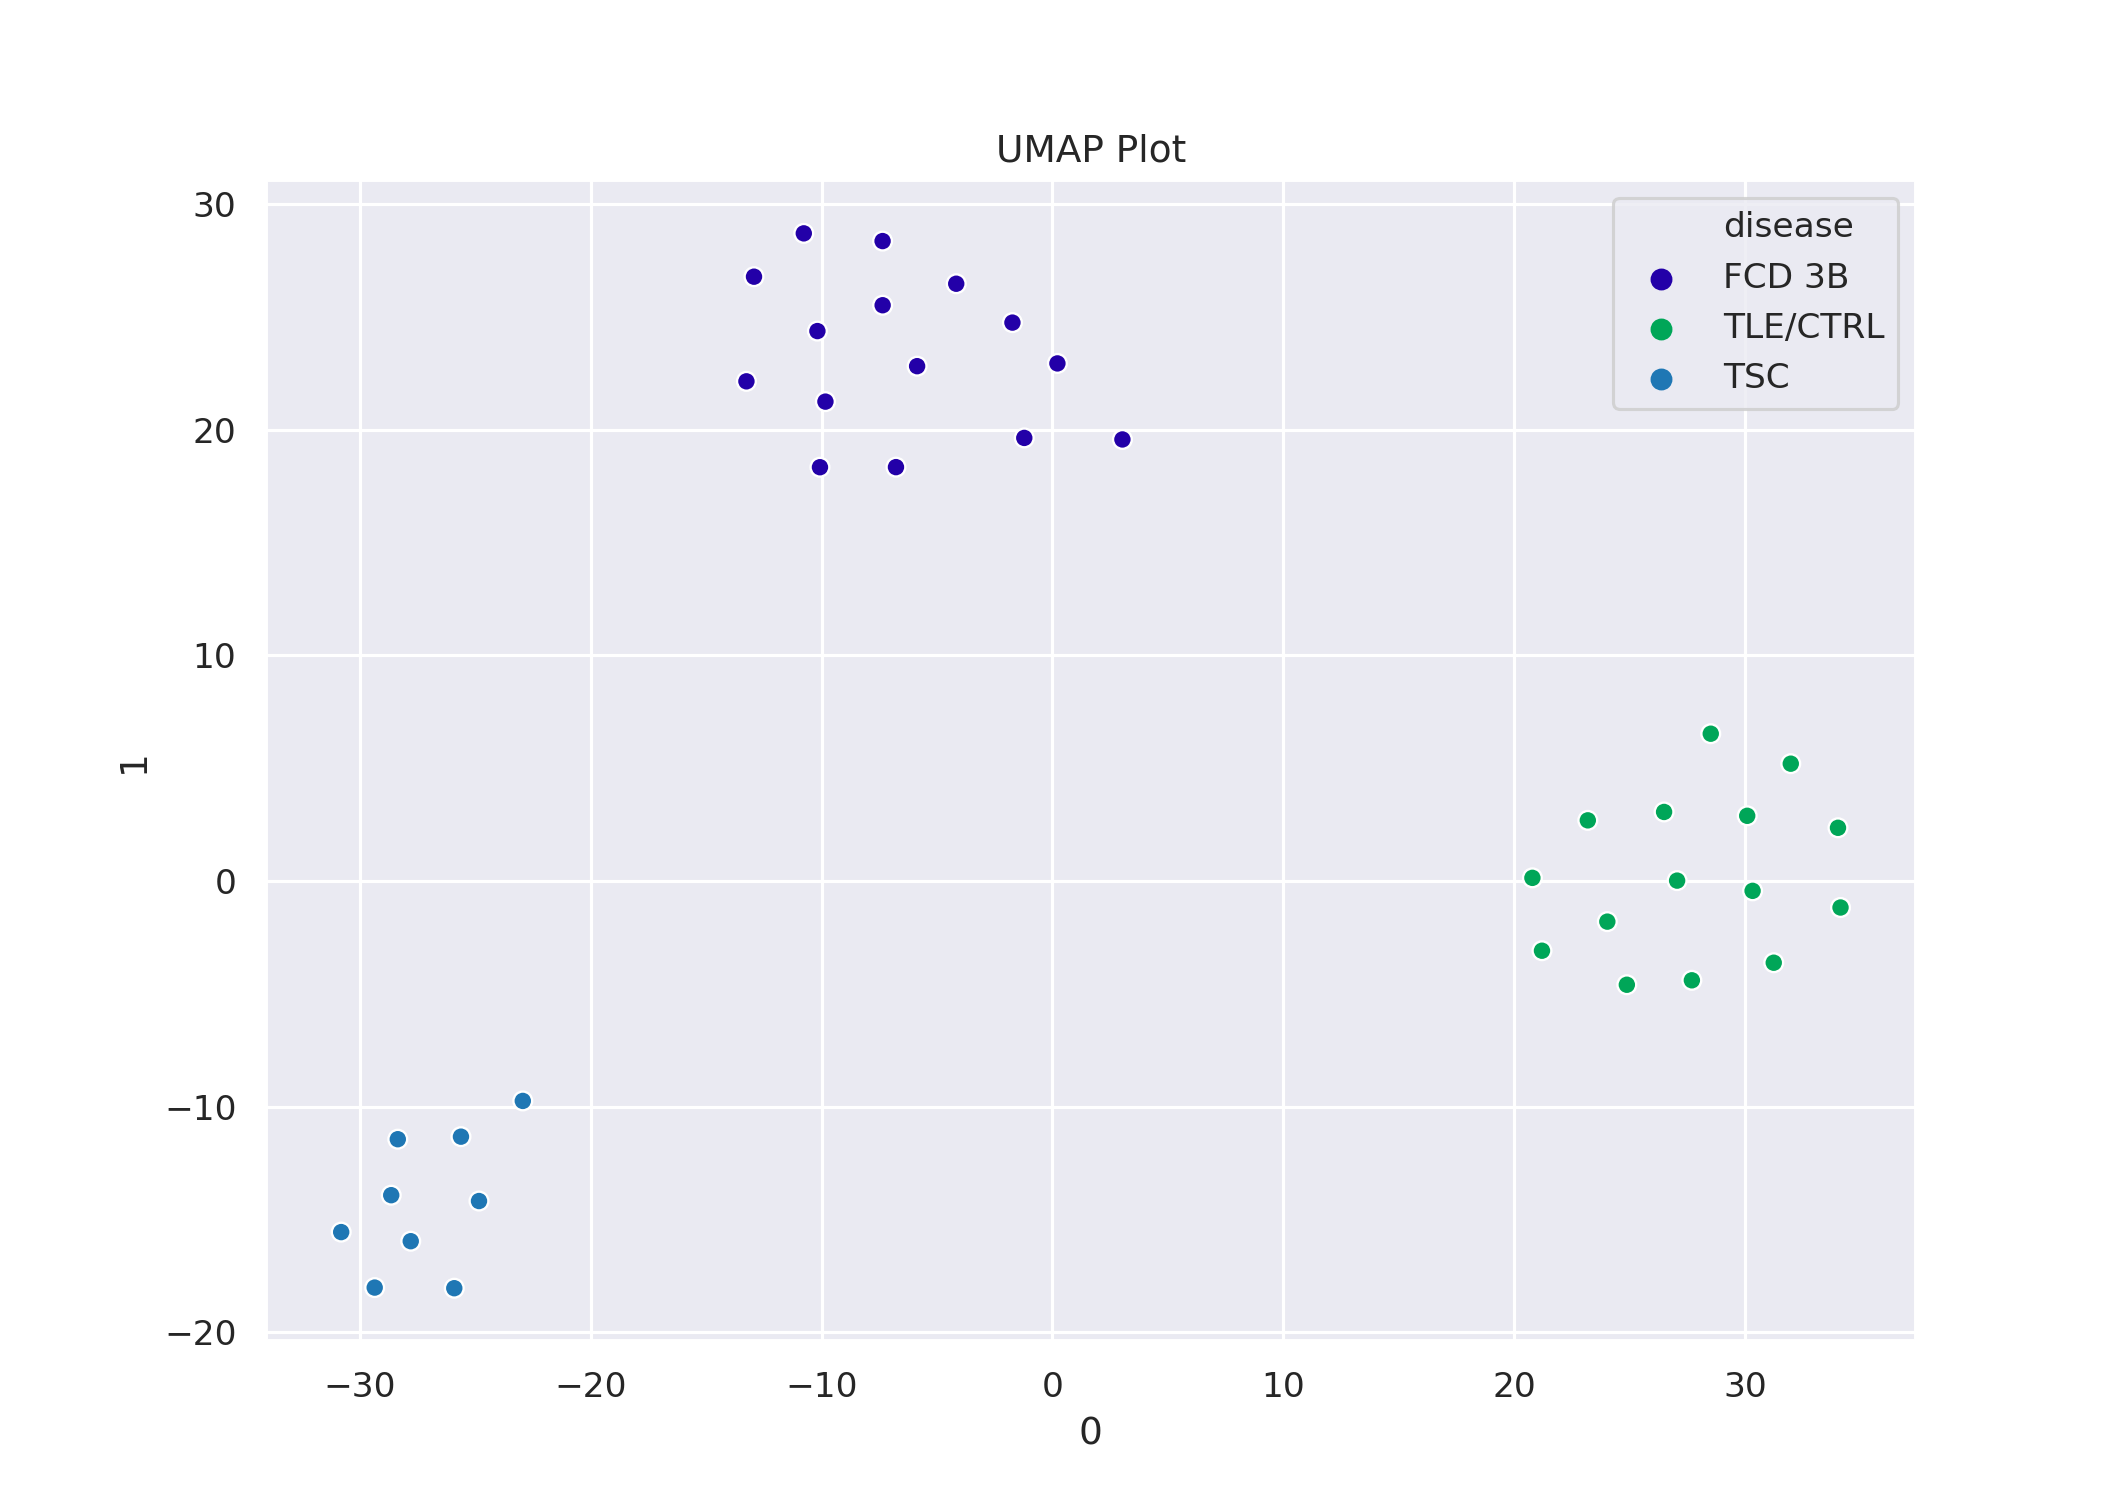

In [51]:
%matplotlib notebook


import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=pheno_py[group].to_numpy()     

fig, ax = plt.subplots()    
#for i in range(len(X_transformed)):
            
#    ax.scatter(X_transformed[0].iloc[i],  
#                X_transformed[1].iloc[i], 
#                color = colors[i%len(colors)],
#                label=categories.iloc[i])
#ax.legend(categories.unique())
#ax.set_xlabel('Principal Component %s'  % (components[0]+1))
#ax.set_ylabel('Principal Component %s'  % (components[1]+1))
#cmap=sns.color_palette('muted') 

import itertools
#sns.set_palette(sns.color_palette("husl", 14))
#palette = itertools.cycle(sns.color_palette())
colors = ['#2300A8', '#00A658','#1f77b4', '#ff7f0e','yellow', 
                       '#d62728', '#9467bd', '#8c564b', 
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#070d0d', '#8ffe09', 'black', 'white', 'blue', 'pink']

colordict={}
for items, values in zip(X_transformed[group].unique().tolist(), colors):
    colordict[items]=values
#palette = zip(X_transformed[group].unique(), sns.crayons.values())

# palette = colordict ,

sns.scatterplot(0,1,hue=group,palette = colordict ,data=X_transformed, ax=ax)
ax.set_title('UMAP Plot')
plt.show()   

### Champ Pipeline

In [227]:
beta_py,mval_py, pheno_py=preproidat.champ_processing(pheno=preproidat.pheno_orig, GRset=grset, RGset=preproidat.RGset, 
                         beta=None, M=None, 
                         autoimpute=True, filterDetP=True, ProbeCutoff=0, SampleCutoff=0.9,
                         filterBeads=True,beadCutoff=1,fixOutlier = True, dropSnPs=True, 
                         filterXY=True, filterNoCG=True, excludeXreactiveprobes=True, array_type='EPIC', verbose=True,
                         badSampleCutoff=10,rm_badsamples=True,detPFilter=False, detPcut=0.01, addQC=False, 
                         imputation_method="imputePCA"
                         )


Now performing badsample removal
Found and removed 2 bad samples

Now removing more bad probes 
Dropping cross- reactive probes


/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



Dropping XY-Chromosome-related probes

  Filtering NoCG Start
    Only Keep CpGs, removing 
 
951
 
 probes from the analysis.

 In total there were 
 
865859
 
 probes for the analysis before filtering.


 
402128
 
 probes have been removed from further analysis.

 In total there are
 
463731
 
 probes left for the analysis.

Now performing champ_filter function
[===========================]
<<<FILTER START>>> 
-----------------------------
 Section 1:  Check Input Start 
  You have inputed 
 
beta,M
 
 for Analysis.
 pd file provided, checking if it's in accord with Data Matrix...
    pd file check success.
  Parameter filterDetP is TRUE, checking if detP in accord with Data Matrix...
    !!! Your detP matrix has been aligned to match the EXACT same rowname and colname as Data Matrix.
  Parameter filterBeads is TRUE, checking if beadcount in accord with Data Matrix...
    !!! Your  beadcount matrix has been aligned to match the EXACT same rowname and colname as Data Matrix.
  parame

In [31]:
preproidat.pheno#=pandas2ri.py2ri(preproidat.pheno_py)

R object with classes: ('DataFrame',) mapped to:
<RS4 - Python:0x7f4aee71bd48 / R:0x55ee100c4920>

In [228]:
preproidat.pheno_py

age_onset  age_surgery                                           Basename  \
0         3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
1        11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
2         NaN         32.0  /home/Deep_Learner/private/network/Methyl_Arra...   
3        20.0         30.0  /home/Deep_Learner/private/network/Methyl_Arra...   
4         NaN         67.0  /home/Deep_Learner/private/network/Methyl_Arra...   
5         NaN         23.0  /home/Deep_Learner/private/network/Methyl_Arra...   
6         NaN         44.0  /home/Deep_Learner/private/network/Methyl_Arra...   
7        44.0         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
8         NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
9        27.0         31.0  /home/Deep_Learner/private/network/Methyl_Arra...   
10       29.0         41.0  /home/Deep_Learner/private/network/Methyl_Arra...   
11       25.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
12       11.0         11.0  /home/Deep_Learner/private/network/Methyl_Arra...   
13        NaN         46.0  /home/Deep_Learner/private/network/Methyl_Arra...   
14        NaN          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
15        NaN          7.0  /home/Deep_Learner/private/network/Methyl_Arra...   
16        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
17        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
18        NaN         14.0  /home/Deep_Learner/private/network/Methyl_Arra...   
19        NaN         27.0  /home/Deep_Learner/private/network/Methyl_Arra...   
20        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
21        NaN         24.0  /home/Deep_Learner/private/network/Methyl_Arra...   
22        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
23        NaN         22.0  /home/Deep_Learner/private/network/Methyl_Arra...   
24        NaN         18.0  /home/Deep_Learner/private/network/Methyl_Arra...   
25        NaN         66.0  /home/Deep_Learner/private/network/Methyl_Arra...   
26        6.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
27        NaN         12.0  /home/Deep_Learner/private/network/Methyl_Arra...   
28        2.0         19.0  /home/Deep_Learner/private/network/Methyl_Arra...   
29        6.0         50.0  /home/Deep_Learner/private/network/Methyl_Arra...   
30       27.0         43.0  /home/Deep_Learner/private/network/Methyl_Arra...   
31        4.0         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
32        3.0         28.0  /home/Deep_Learner/private/network/Methyl_Arra...   
33        1.0         55.0  /home/Deep_Learner/private/network/Methyl_Arra...   
34        0.6         15.0  /home/Deep_Learner/private/network/Methyl_Arra...   
35        NaN         45.0  /home/Deep_Learner/private/network/Methyl_Arra...   
36        5.0         68.0  /home/Deep_Learner/private/network/Methyl_Arra...   
37        NaN         40.0  /home/Deep_Learner/private/network/Methyl_Arra...   
38        NaN         26.0  /home/Deep_Learner/private/network/Methyl_Arra...   
39        NaN         33.0  /home/Deep_Learner/private/network/Methyl_Arra...   
40        1.0         48.0  /home/Deep_Learner/private/network/Methyl_Arra...   
41        0.0          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
42        0.0          2.0  /home/Deep_Learner/private/network/Methyl_Arra...   
43        0.0          1.0  /home/Deep_Learner/private/network/Methyl_Arra...   
44        0.0         29.0  /home/Deep_Learner/private/network/Methyl_Arra...   
45        0.0          5.0  /home/Deep_Learner/private/network/Methyl_Arra...   
46        0.0          4.0  /home/Deep_Learner/private/network/Methyl_Arra...   
47        0.0          3.0  /home/Deep_Learner/private/network/Methyl_Arra...   
48        0.0          6.0  /home/D

In [229]:
preproidat.beta_py

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg09499020                    0.156923                    0.422315   
cg16535257                    0.238335                    0.169370   
cg06325811                    0.478600                    0.593693   
cg16619049                    0.229611                    0.310454   
cg18147296                    0.794871                    0.761840   
...                                ...                         ...   
cg27236246                    0.707283                    0.588184   
cg05615487                    0.810684                    0.793200   
cg22122449                    0.840274                    0.799708   
cg08423507                    0.801299                    0.767194   
cg19565306                    0.054774                    0.024667   

            FCD 3B.203189480060_R01C01  FCD 3B.203189480060_R02C01  \
cg09499020                    0.138946                    0.105289   
cg16535257                    0.221738                    0.183341   
cg06325811                    0.482502                    0.465105   
cg16619049                    0.298304                    0.312625   
cg18147296                    0.739049                    0.733477   
...                                ...                         ...   
cg27236246                    0.669365                    0.668608   
cg05615487                    0.819091                    0.805608   
cg22122449                    0.799685                    0.839762   
cg08423507                    0.791393                    0.833585   
cg19565306                    0.055600                    0.068628   

            FCD 3B.203189480060_R03C01  FCD 3B.203189480060_R04C01  \
cg09499020                    0.166462                    0.149487   
cg16535257                    0.165361                    0.173431   
cg06325811                    0.582051                    0.463323   
cg16619049                    0.219149                    0.136930   
cg18147296                    0.804378                    0.750398   
...                                ...                         ...   
cg27236246                    0.642855                    0.721008   
cg05615487                    0.681758                    0.856475   
cg22122449                    0.811784                    0.785157   
cg08423507                    0.758596                    0.824727   
cg19565306                    0.040871                    0.025904   

            FCD 3B.203189480060_R05C01  FCD 3B.203189480060_R06C01  \
cg09499020                    0.161774                    0.144102   
cg16535257                    0.161027                    0.087939   
cg06325811                    0.618723                    0.453706   
cg16619049                    0.233954                    0.259490   
cg18147296                    0.769173                    0.791540   
...                                ...                         ...   
cg27236246                    0.643210                    0.746420   
cg05615487                    0.621162                    0.830387   
cg22122449                    0.808449                    0.852215   
cg08423507                    0.749548                    0.851625   
cg19565306                    0.047212                    0.053306   

            FCD 3B.203189480060_R07C01  FCD 3B.203189480060_R08C01  ...  \
cg09499020                    0.144201                    0.205977  ...   
cg16535257                    0.177919                    0.220226  ...   
cg06325811                    0.498835                    0.476062  ...   
cg16619049                    0.243354                    0.323805  ...   
cg18147296                    0.698707                    0.698555  ...   
...                                ...                         ...  ...   
cg27236246                    0.743181                    0.764571  ...   
cg05615487                    0.866029          

In [230]:
#without removal of cpgs
preproidat.mval_py

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg09499020                   -2.425602                   -0.451966   
cg16535257                   -1.676168                   -2.294030   
cg06325811                   -0.123569                    0.547148   
cg16619049                   -1.746392                   -1.151270   
cg18147296                    1.954186                    1.677555   
...                                ...                         ...   
cg27236246                    1.272781                    0.514266   
cg05615487                    2.098339                    1.939444   
cg22122449                    2.395259                    1.997369   
cg08423507                    2.011744                    1.720464   
cg19565306                   -4.109100                   -5.305217   

            FCD 3B.203189480060_R01C01  FCD 3B.203189480060_R02C01  \
cg09499020                   -2.631574                   -3.087066   
cg16535257                   -1.811399                   -2.155201   
cg06325811                   -0.101017                   -0.201699   
cg16619049                   -1.234062                   -1.136664   
cg18147296                    1.501894                    1.460490   
...                                ...                         ...   
cg27236246                    1.017556                    1.012621   
cg05615487                    2.178757                    2.051114   
cg22122449                    1.997163                    2.389764   
cg08423507                    1.923611                    2.324541   
cg19565306                   -4.086250                   -3.762488   

            FCD 3B.203189480060_R03C01  FCD 3B.203189480060_R04C01  \
cg09499020                   -2.324052                   -2.508316   
cg16535257                   -2.335536                   -2.252776   
cg06325811                    0.477819                   -0.212037   
cg16619049                   -1.833133                   -2.656042   
cg18147296                    2.039801                    1.588023   
...                                ...                         ...   
cg27236246                    0.847984                    1.369793   
cg05615487                    1.099134                    2.577111   
cg22122449                    2.108708                    1.869701   
cg08423507                    1.651879                    2.234310   
cg19565306                   -4.552587                   -5.232791   

            FCD 3B.203189480060_R05C01  FCD 3B.203189480060_R06C01  \
cg09499020                   -2.373356                   -2.570347   
cg16535257                   -2.381320                   -3.374557   
cg06325811                    0.698456                   -0.267918   
cg16619049                   -1.711209                   -1.512840   
cg18147296                    1.736497                    1.924891   
...                                ...                         ...   
cg27236246                    0.850215                    1.557546   
cg05615487                    0.713387                    2.291533   
cg22122449                    2.077427                    2.527717   
cg08423507                    1.581485                    2.520966   
cg19565306                   -4.334937                   -4.150532   

            FCD 3B.203189480060_R07C01  FCD 3B.203189480060_R08C01  ...  \
cg09499020                   -2.569191                   -1.946695  ...   
cg16535257                   -2.208063                   -1.824075  ...   
cg06325811                   -0.006725                   -0.138246  ...   
cg16619049                   -1.636565                   -1.062311  ...   
cg18147296                    1.213520                    1.212480  ...   
...                                ...                         ...  ...   
cg27236246                    1.532964                    1.699355  ...   
cg05615487                    2.692489          

<IPython.core.display.Javascript object>


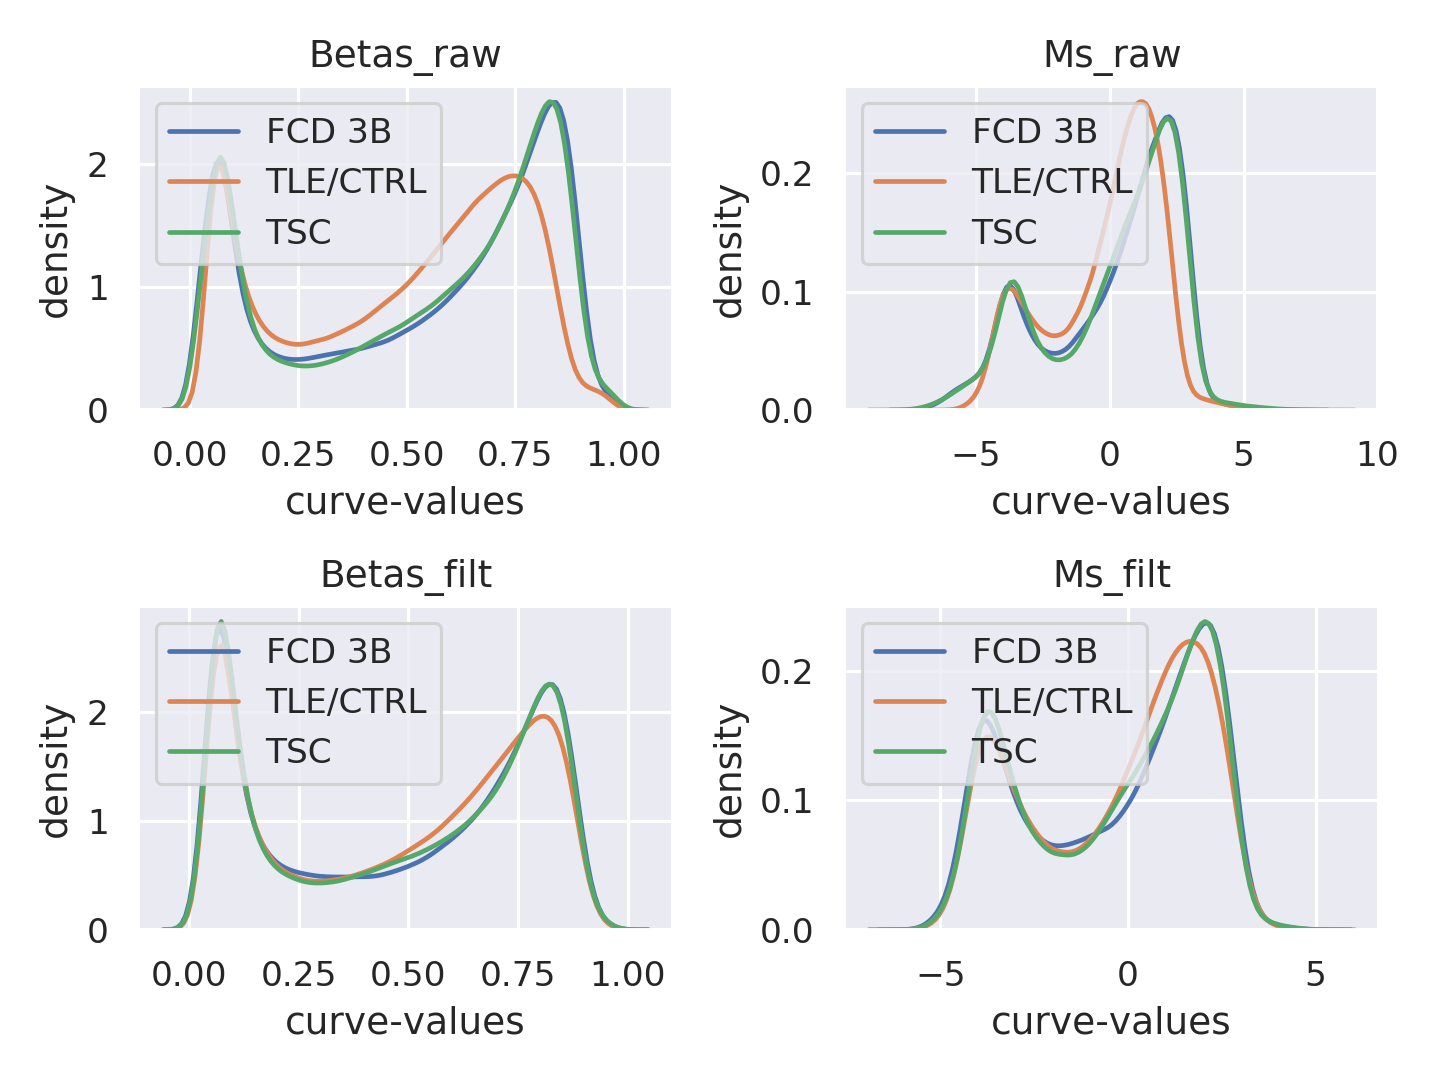

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less

/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:75: RuntimeWarning:

invalid value encountered in reduce



In [215]:
## visualise what the data looks like before and after normalisation
%matplotlib notebook
preproidat.plt_curves(matrix={'Betas_raw':betas_raw,'Ms_raw':mvals_raw,'Betas_filt':preproidat.beta_py,'Ms_filt':preproidat.mval_py}, variant="grouped", group_by='disease', nrows=2)

<IPython.core.display.Javascript object>


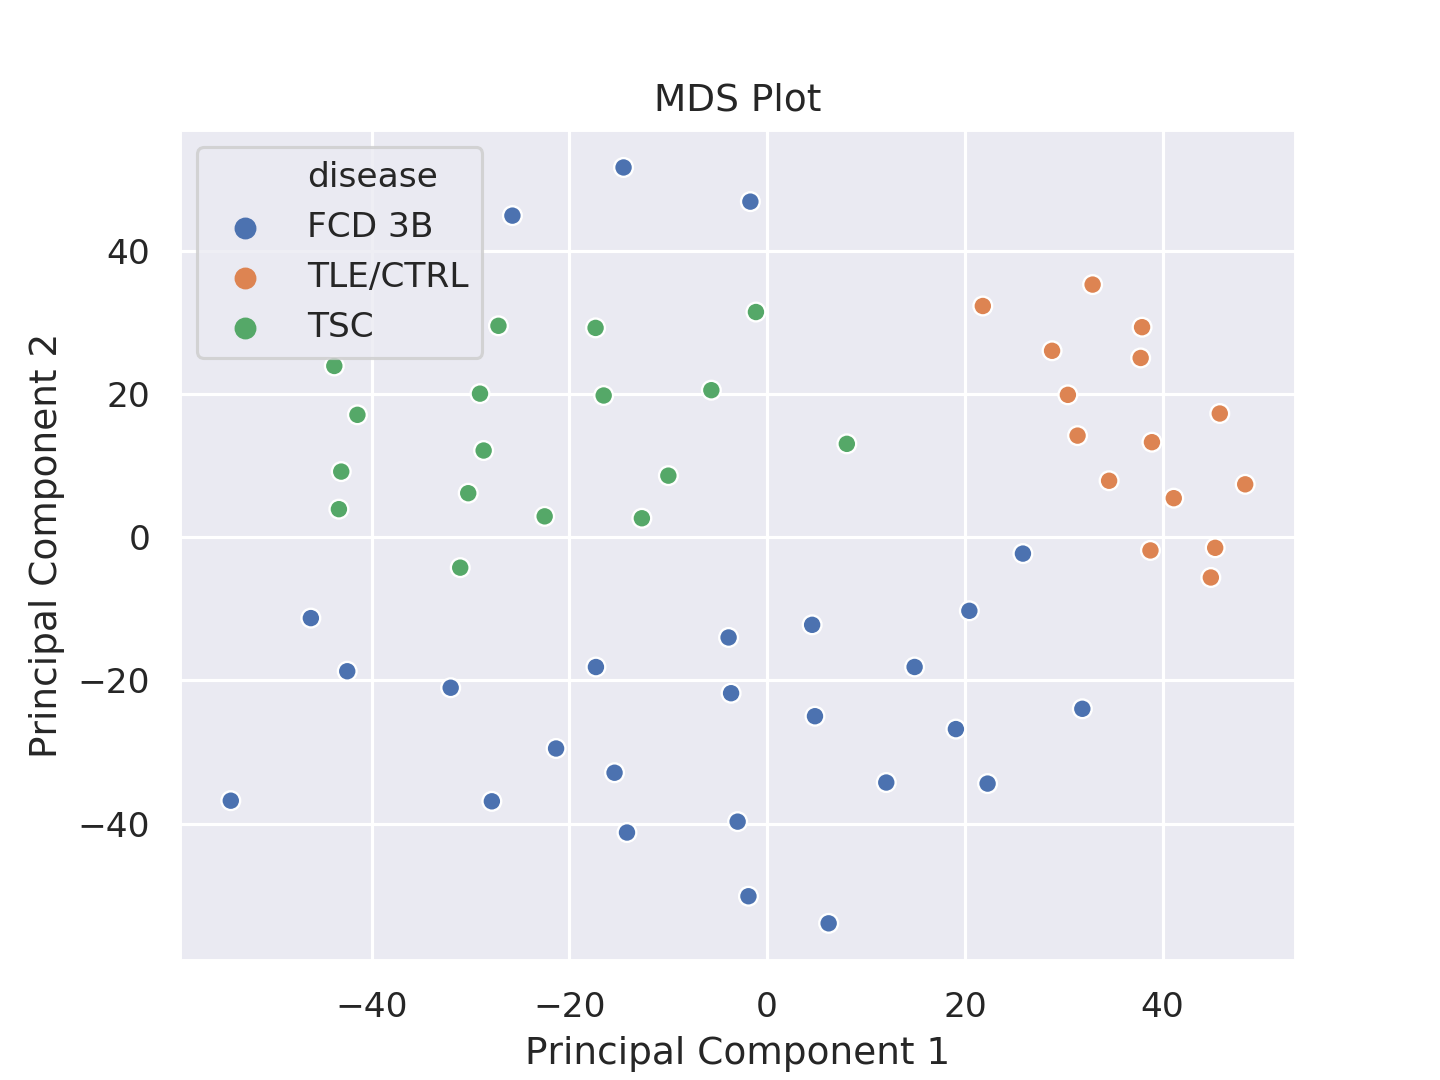

In [216]:
%matplotlib notebook
preproidat.plt_mds(dataframe=preproidat.mval_py, pheno=preproidat.pheno_py, n_components=2, group='disease', components=(0,1)) 

<IPython.core.display.Javascript object>


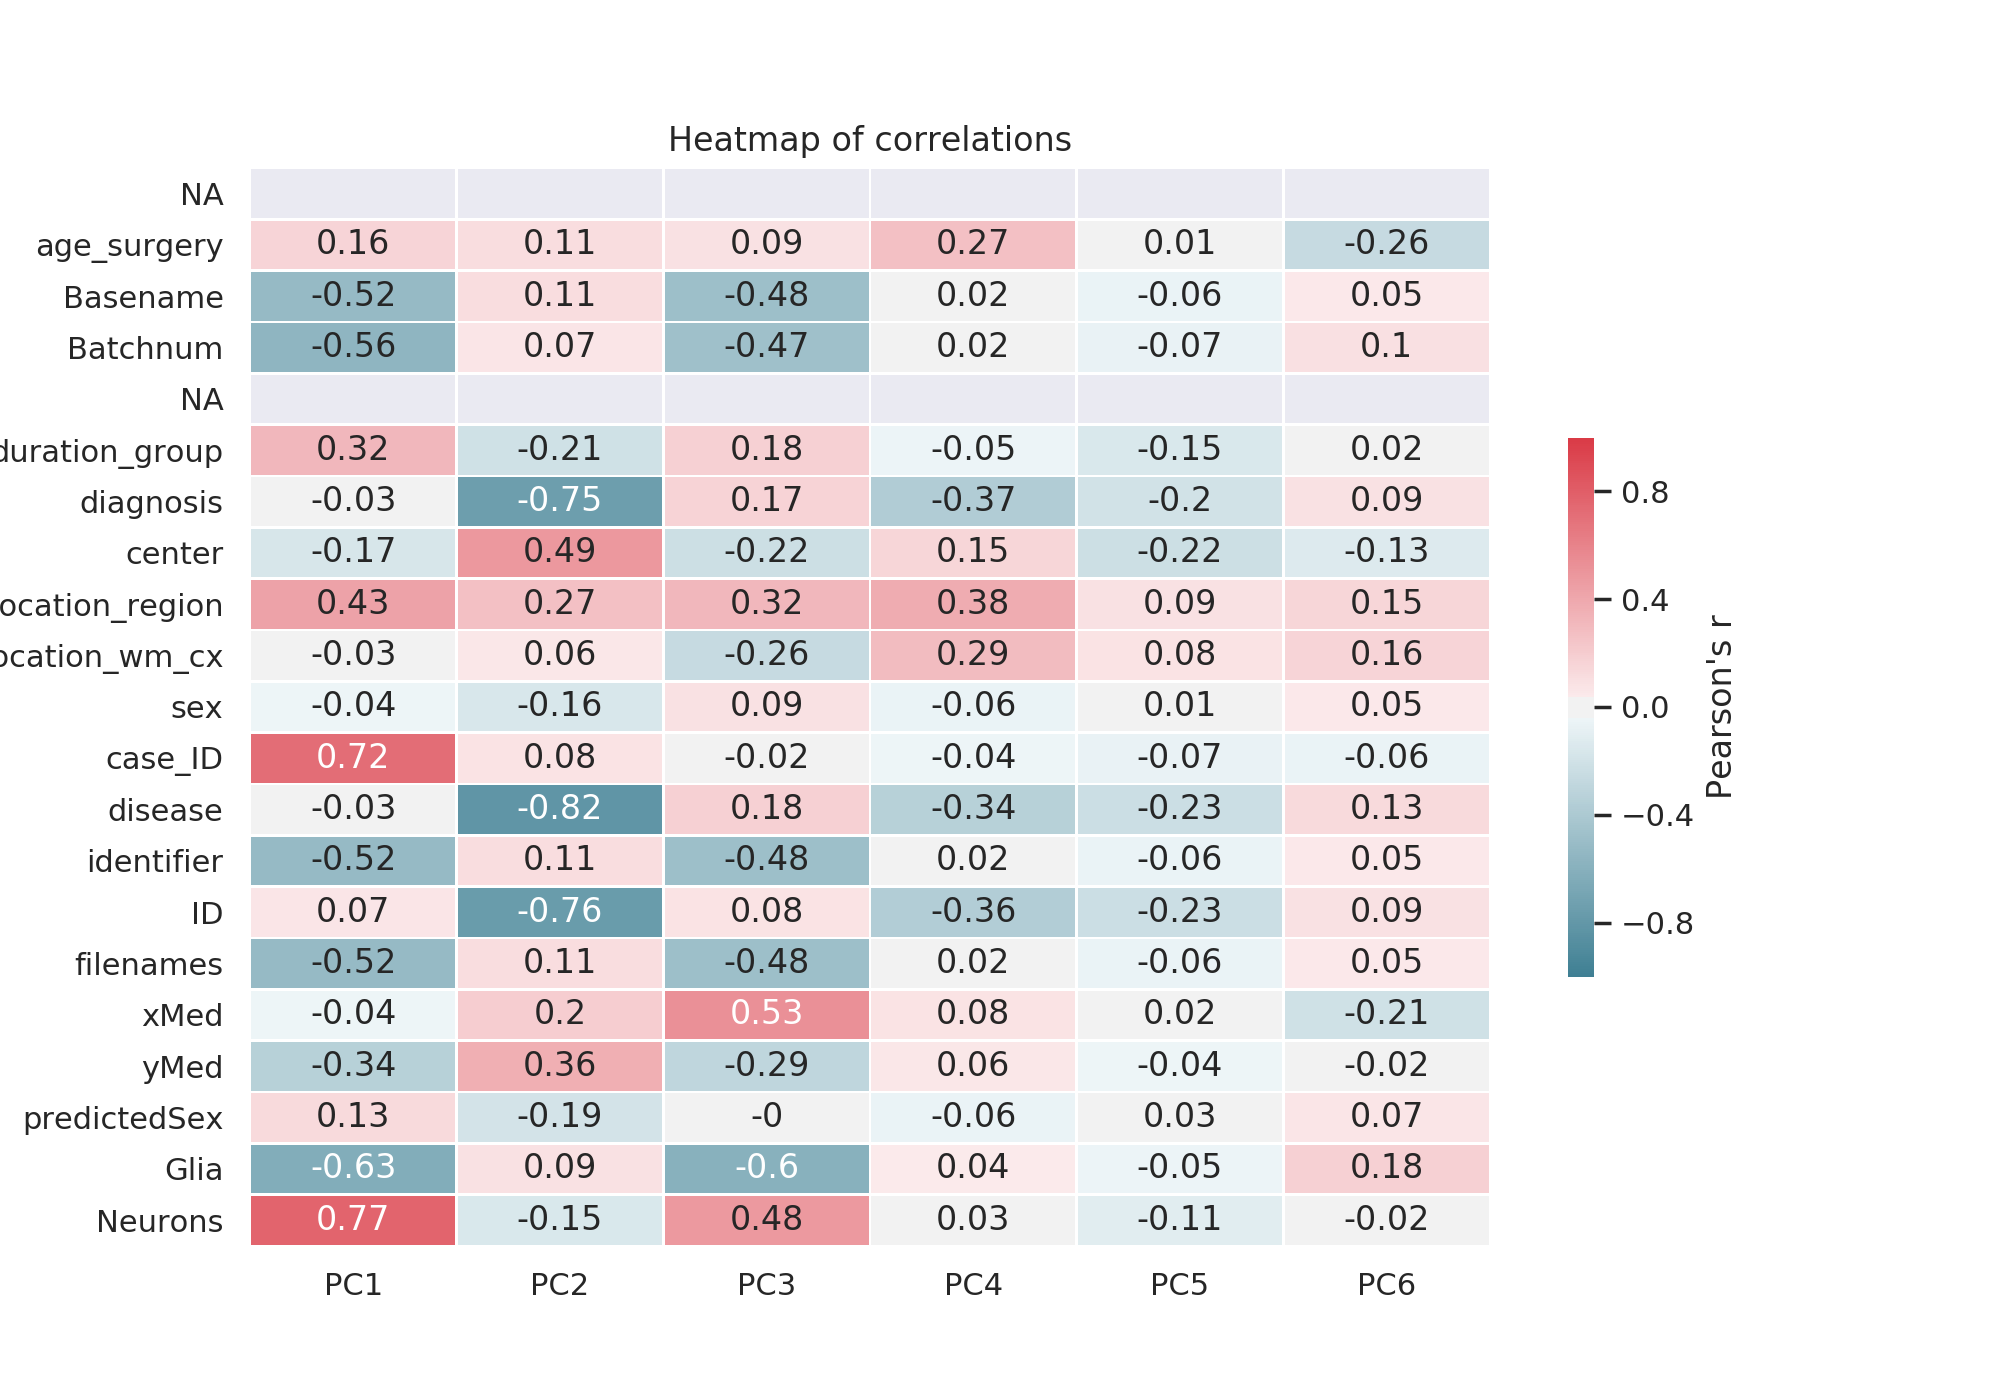

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:972: RuntimeWarning:

invalid value encountered in subtract



In [62]:
%matplotlib notebook
preproidat.plt_covariates(matrix=preproidat.mval, pheno=preproidat.pheno, pcs=6)

In [217]:
preproidat.dmp_finder(matrix=preproidat.mval, 
                      pheno=preproidat.pheno, 
                      phenotype='disease',
                      #adjust_vars=['age_surgery'],
                      #correction_vars=['location_region', 'sex'],#,,'location_region', location_wm_cx'
                      useCombat=False,
                      #sva=True,
                      number=100, 
                      pvalue=0.01, 
                      adjpval=1,
                      save_csv=False,
                      path=None)

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



These are the possible pairwise groups for your comparisons 
 {1: 'FCD 3B-TLE/CTRL', 2: 'FCD 3B-TSC', 3: 'TLE/CTRL-TSC'}
Enter your comparison of choice;- to get all comparisons type "all":
all
you selected all
You are adjusting for these variables: []
You are correcting for these variables: []
creating model
~0 + disease

<environment: 0x7fb3fce9f1f0>

Creating contrast matrix for experiment
Computing statistics for experiment
Aligning annotation
Computing contrasts for experiment
done


In [218]:
len(preproidat.dmps)

270

In [219]:
preproidat.dectest

diseaseFCD.3B-diseaseTLE.CTRL  diseaseFCD.3B-diseaseTSC  \
Down                          60991.0                   33295.0   
NotSig                       311360.0                  372631.0   
Up                            66204.0                   32629.0   

        diseaseTLE.CTRL-diseaseTSC  
Down                       78182.0  
NotSig                    284519.0  
Up                         75854.0

In [220]:
mval_10000=preproidat.mval_py.loc[preproidat.dmps]; mval_10000

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg05013000                    1.625523                    1.376656   
cg23454205                    3.606623                    2.449581   
cg07721625                   -0.673060                   -1.126525   
cg18836486                    0.218615                    0.509064   
cg15119954                    2.140472                    2.109155   
...                                ...                         ...   
cg24214168                    1.866858                    1.287726   
cg17374034                    2.748050                    2.005099   
cg09185990                    1.354958                    0.823633   
cg09641623                    1.240610                    1.904411   
cg26380756                   -5.875005                   -3.896186   

            FCD 3B.203189480060_R01C01  FCD 3B.203189480060_R02C01  \
cg05013000                    1.482889                    1.619948   
cg23454205                    2.572846                    3.018373   
cg07721625                   -0.880164                   -1.533080   
cg18836486                   -0.011995                    0.645817   
cg15119954                    1.985843                    1.586965   
...                                ...                         ...   
cg24214168                    1.581110                    2.219128   
cg17374034                    2.494106                    2.367854   
cg09185990                    0.893197                    1.033521   
cg09641623                    1.763762                    1.753078   
cg26380756                   -4.920380                   -4.694199   

            FCD 3B.203189480060_R03C01  FCD 3B.203189480060_R04C01  \
cg05013000                    0.530241                    1.456649   
cg23454205                    2.761661                    2.773963   
cg07721625                   -1.396608                   -1.417659   
cg18836486                   -0.176232                    0.166508   
cg15119954                   -0.389821                    1.931511   
...                                ...                         ...   
cg24214168                    1.941515                    1.471517   
cg17374034                    2.470539                    3.329943   
cg09185990                    1.415032                    1.491031   
cg09641623                    1.384417                    1.678793   
cg26380756                   -5.501275                   -4.962775   

            FCD 3B.203189480060_R05C01  FCD 3B.203189480060_R06C01  \
cg05013000                    0.677050                    1.367676   
cg23454205                    2.685009                    3.453505   
cg07721625                   -0.160210                   -1.467883   
cg18836486                   -0.033176                    0.613579   
cg15119954                    1.946269                    1.069929   
...                                ...                         ...   
cg24214168                    2.035801                    1.976636   
cg17374034                    2.692169                    2.928712   
cg09185990                    1.676090                    1.815277   
cg09641623                    2.291132                    2.149569   
cg26380756                   -4.898247                   -4.696603   

            FCD 3B.203189480060_R07C01  FCD 3B.203189480060_R08C01  ...  \
cg05013000                    1.412991                    1.470420  ...   
cg23454205                    3.252103                    3.189240  ...   
cg07721625                   -0.794824                   -0.819848  ...   
cg18836486                    0.184410                   -0.046173  ...   
cg15119954                    1.278142                    1.085269  ...   
...                                ...                         ...  ...   
cg24214168                    1.799948                    1.785057  ...   
cg17374034                    2.933855          

In [221]:
beta_10000=preproidat.beta_py.loc[preproidat.dmps];beta_10000

FCD 3B.203273200108_R07C01  FCD 3B.203273200108_R08C01  \
cg05013000                    0.755234                    0.721964   
cg23454205                    0.924136                    0.845263   
cg07721625                    0.385438                    0.314137   
cg18836486                    0.537811                    0.587310   
cg15119954                    0.815125                    0.811832   
...                                ...                         ...   
cg24214168                    0.784825                    0.709423   
cg17374034                    0.870434                    0.800565   
cg09185990                    0.718935                    0.638971   
cg09641623                    0.702645                    0.789188   
cg26380756                    0.016754                    0.062936   

            FCD 3B.203189480060_R01C01  FCD 3B.203189480060_R02C01  \
cg05013000                    0.736501                    0.754519   
cg23454205                    0.856111                    0.890140   
cg07721625                    0.352040                    0.256803   
cg18836486                    0.497921                    0.610079   
cg15119954                    0.798425                    0.750260   
...                                ...                         ...   
cg24214168                    0.749499                    0.823200   
cg17374034                    0.849257                    0.837708   
cg09185990                    0.650018                    0.671810   
cg09641623                    0.772511                    0.771207   
cg26380756                    0.031967                    0.037192   

            FCD 3B.203189480060_R03C01  FCD 3B.203189480060_R04C01  \
cg05013000                    0.590863                    0.732956   
cg23454205                    0.871494                    0.872446   
cg07721625                    0.275268                    0.272367   
cg18836486                    0.469499                    0.528822   
cg15119954                    0.432857                    0.792296   
...                                ...                         ...   
cg24214168                    0.793435                    0.734968   
cg17374034                    0.847153                    0.909549   
cg09185990                    0.727272                    0.737595   
cg09641623                    0.723043                    0.761995   
cg26380756                    0.021601                    0.031070   

            FCD 3B.203189480060_R05C01  FCD 3B.203189480060_R06C01  \
cg05013000                    0.615217                    0.720713   
cg23454205                    0.865426                    0.916352   
cg07721625                    0.472266                    0.265523   
cg18836486                    0.494251                    0.604751   
cg15119954                    0.793974                    0.677350   
...                                ...                         ...   
cg24214168                    0.803941                    0.797396   
cg17374034                    0.866003                    0.883914   
cg09185990                    0.761655                    0.778725   
cg09641623                    0.830347                    0.816073   
cg26380756                    0.032446                    0.037132   

            FCD 3B.203189480060_R07C01  FCD 3B.203189480060_R08C01  ...  \
cg05013000                    0.726991                    0.734820  ...   
cg23454205                    0.905011                    0.901199  ...   
cg07721625                    0.365649                    0.361635  ...   
cg18836486                    0.531912                    0.492000  ...   
cg15119954                    0.708052                    0.679669  ...   
...                                ...                         ...  ...   
cg24214168                    0.776889                    0.775095  ...   
cg17374034                    0.884279          

<IPython.core.display.Javascript object>


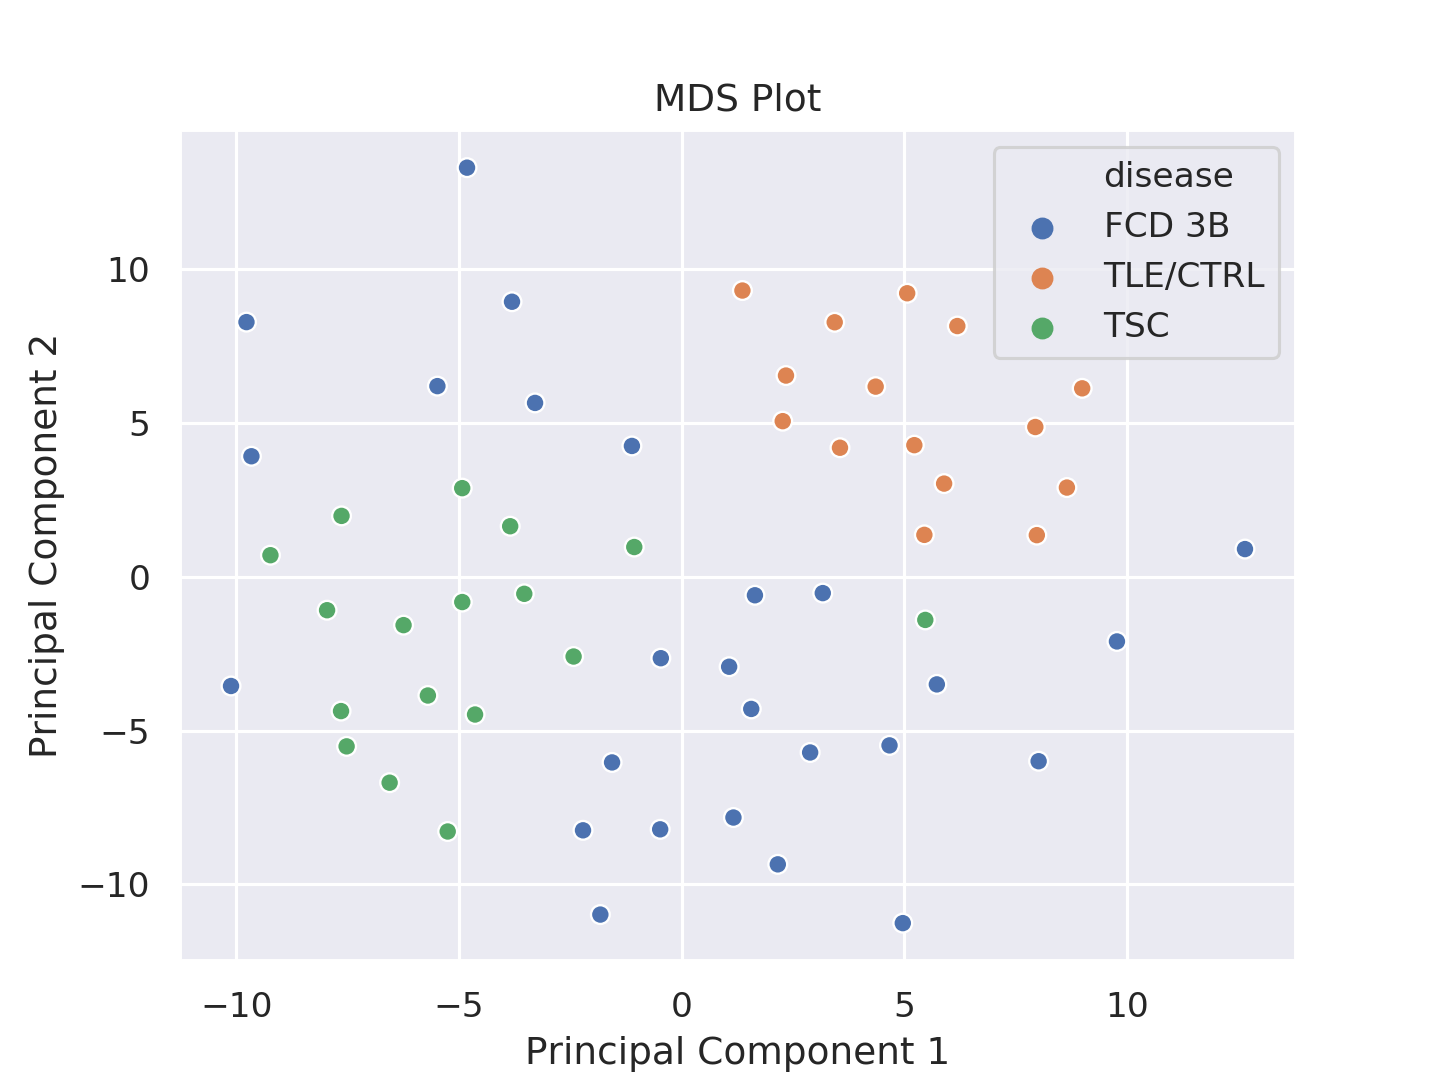

In [222]:
####quantile
%matplotlib notebook
preproidat.plt_mds(mval_10000, preproidat.pheno_py, n_components=2, group='disease', components=(0,1)) 

In [223]:
import umap
from sklearn.preprocessing import LabelEncoder
import time
to_embed=mval_10000
time_start = time.time()

mapper = umap.UMAP(n_neighbors=15,
                      min_dist=0.0,
                      n_components=2,
                      metric='correlation',
                     random_state=123,
                     spread=10
                      ).fit(to_embed.transpose() )

#LabelEncoder().fit_transform(y_train.to_numpy())
embedding=mapper.transform(to_embed.transpose())
print ('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 0.11927628517150879 seconds


/opt/conda/lib/python3.7/site-packages/umap/umap_.py:1052: RuntimeWarning:

divide by zero encountered in power



In [224]:
embedding.shape

(58, 2)

In [225]:
preproidat.pheno_py[group].unique()

array(['FCD 3B', 'TLE/CTRL', 'TSC'], dtype=object)

<IPython.core.display.Javascript object>


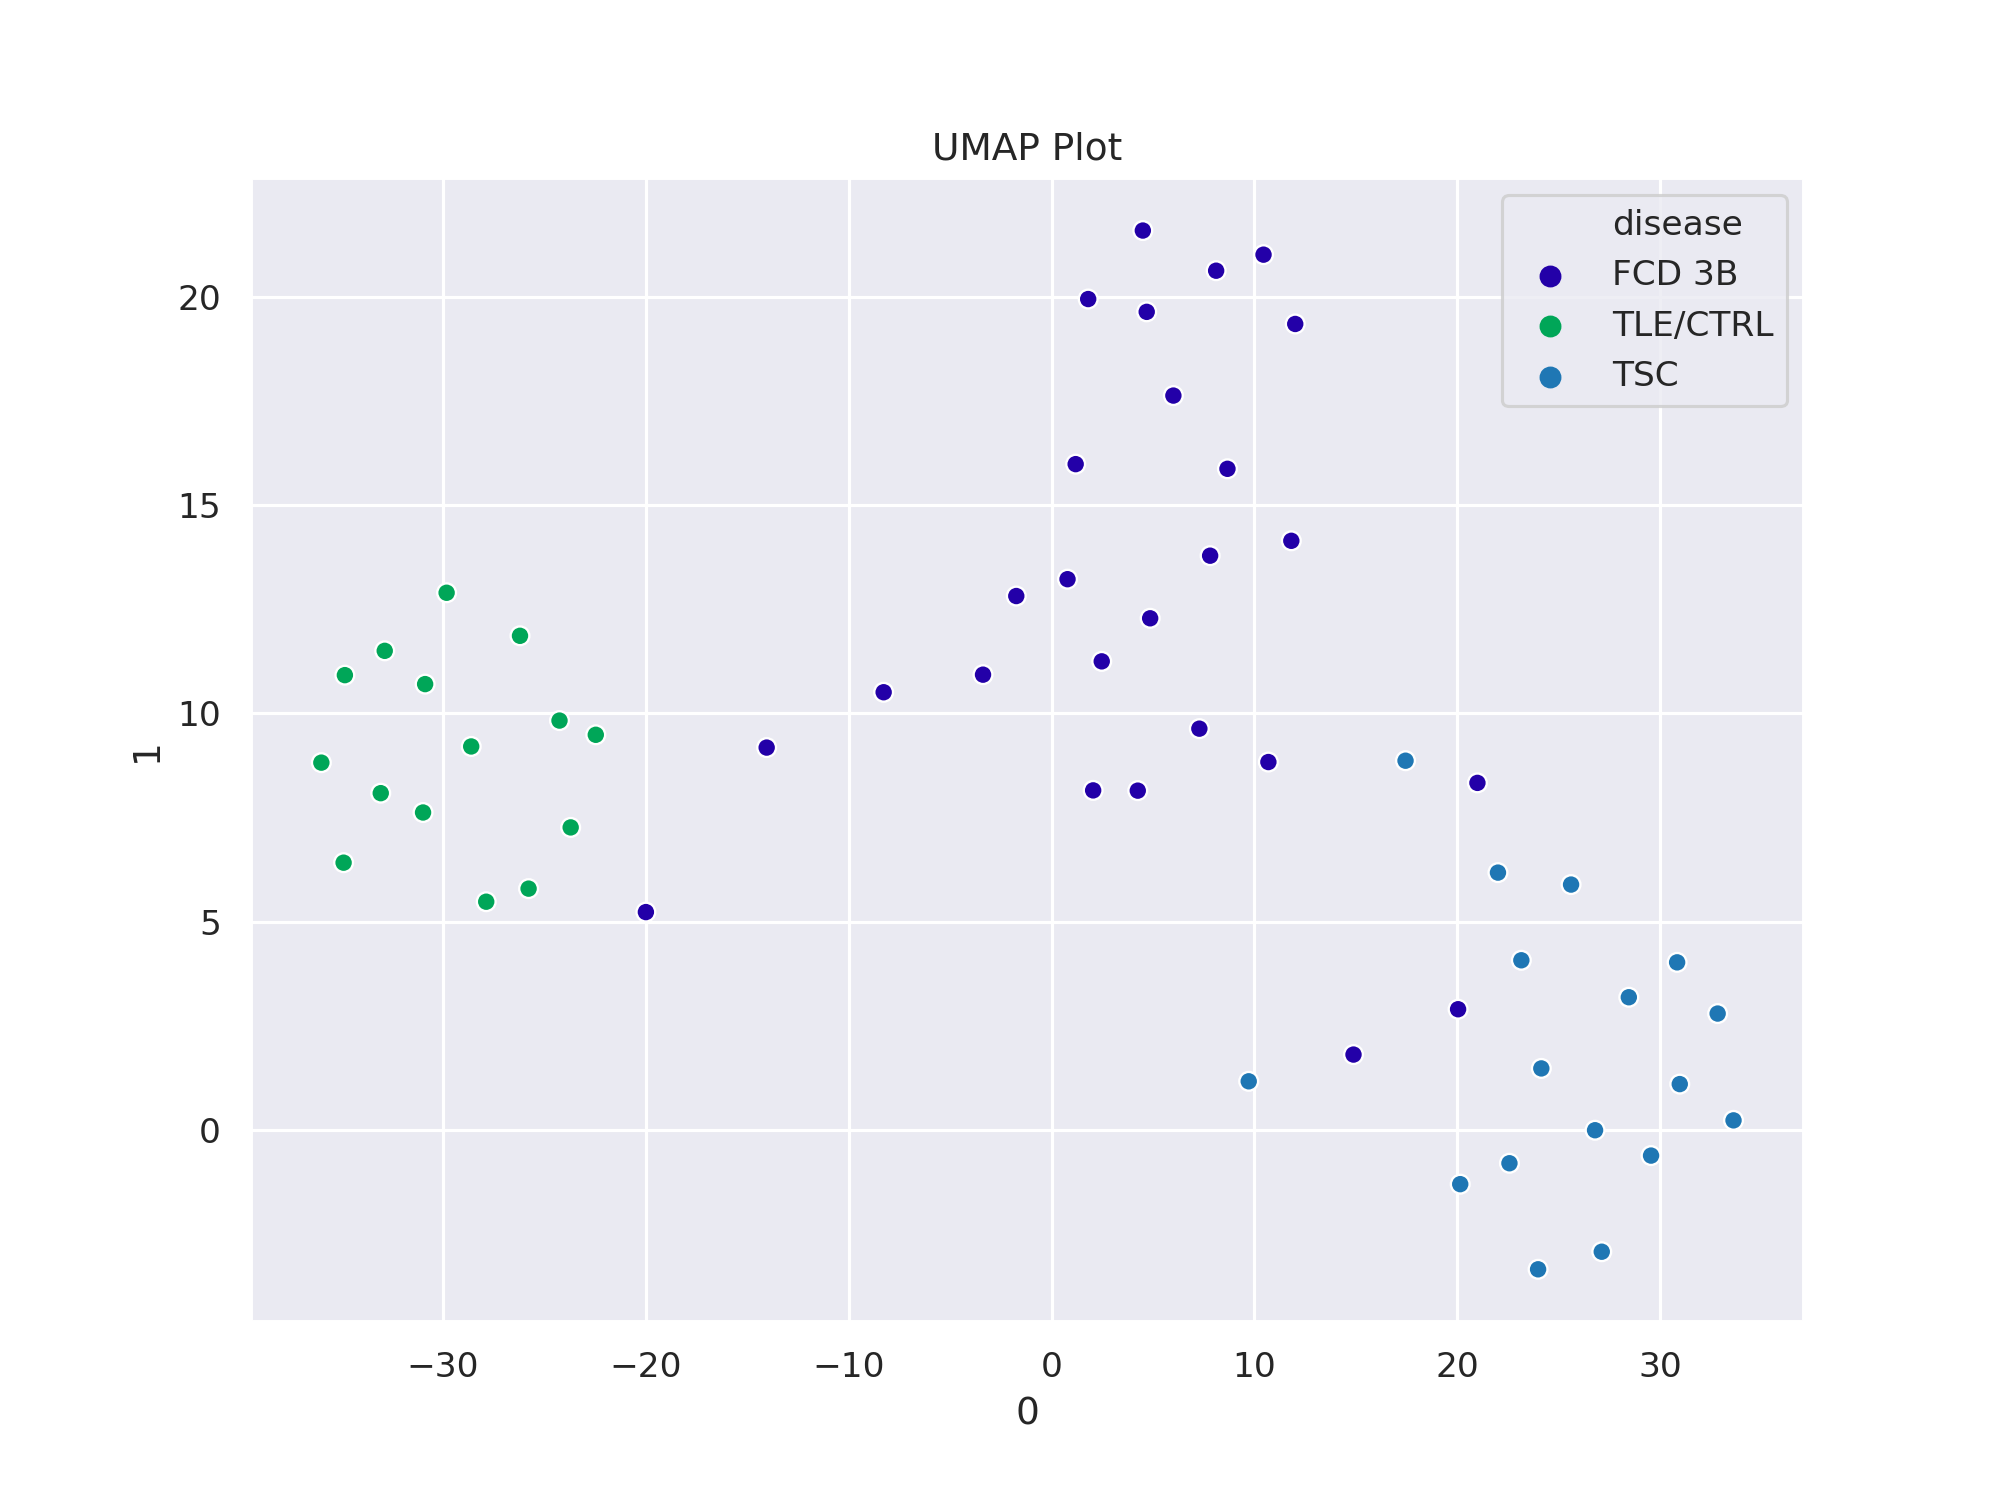

In [226]:
%matplotlib notebook


import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import cubehelix_palette
group='disease'

X_transformed=pd.DataFrame(embedding)
X_transformed[group]=preproidat.pheno_py[group].to_numpy()     

fig, ax = plt.subplots()    
#for i in range(len(X_transformed)):
            
#    ax.scatter(X_transformed[0].iloc[i],  
#                X_transformed[1].iloc[i], 
#                color = colors[i%len(colors)],
#                label=categories.iloc[i])
#ax.legend(categories.unique())
#ax.set_xlabel('Principal Component %s'  % (components[0]+1))
#ax.set_ylabel('Principal Component %s'  % (components[1]+1))
#cmap=sns.color_palette('muted') 

import itertools
#sns.set_palette(sns.color_palette("husl", 14))
#palette = itertools.cycle(sns.color_palette())
colors = ['#2300A8', '#00A658','#1f77b4', '#ff7f0e','yellow', 
                       '#d62728', '#9467bd', '#8c564b', 
                      '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#070d0d', '#8ffe09', 'black', 'white', 'blue', 'pink']

colordict={}
for items, values in zip(X_transformed[group].unique().tolist(), colors):
    colordict[items]=values
#palette = zip(X_transformed[group].unique(), sns.crayons.values())

# palette = colordict ,

sns.scatterplot(0,1,hue=group,palette = colordict ,data=X_transformed, ax=ax)
ax.set_title('UMAP Plot')
plt.show()   

In [105]:
mval_10000.to_csv('mval_10000.csv', index=False)
beta_10000.to_csv('beta_10000.csv', index=False)
pheno.to_csv('pheno.csv', index=False)

In [66]:
mval_10000

CTRL.202818860053_R04C01  CTRL.202818860053_R05C01  \
cg13211021                  2.134935                 -0.267658   
cg21099767                  1.286169                  1.470445   
cg07872854                  2.509267                  2.686531   
cg02510381                  2.442296                 -0.267658   
cg19866944                  2.185841                 -0.267658   
...                              ...                       ...   
cg26340968                  2.359707                  1.766196   
cg22498143                  1.395750                  1.123513   
cg07435331                  0.147186                  0.028006   
cg23401282                  1.274249                  0.996342   
cg07732348                  0.703665                  0.174892   

            CTRL.202818860053_R06C01  CTRL.202818860053_R07C01  \
cg13211021                  1.108773                  1.689598   
cg21099767                  3.140734                  0.476749   
cg07872854                  2.683560                 -0.362464   
cg02510381                  2.463107                 -0.362464   
cg19866944                 -0.218542                 -0.362464   
...                              ...                       ...   
cg26340968                  2.405455                  0.207839   
cg22498143                  1.999160                  0.801021   
cg07435331                  0.395173                  0.102514   
cg23401282                  1.826537                  0.856264   
cg07732348                 -0.056589                 -0.657828   

            CTRL.202818860053_R08C01  CTRL.202931510124_R01C01  \
cg13211021                  1.492799                  0.993806   
cg21099767                  2.197652                  1.445300   
cg07872854                  1.281631                  1.942652   
cg02510381                  1.147157                  2.438683   
cg19866944                 -0.232936                 -0.226156   
...                              ...                       ...   
cg26340968                  1.914919                  0.545024   
cg22498143                  2.126898                  0.757936   
cg07435331                  1.110374                 -0.403649   
cg23401282                  1.410207                  1.195406   
cg07732348                  0.391310                 -0.982195   

            CTRL.202931510124_R02C01  CTRL.202931510124_R03C01  \
cg13211021                 -0.467027                 -0.414829   
cg21099767                 -0.467027                 -0.414829   
cg07872854                 -0.467027                 -0.414829   
cg02510381                 -0.467027                 -0.414829   
cg19866944                 -0.467027                 -0.414829   
...                              ...                       ...   
cg26340968                  2.543218                  0.958906   
cg22498143                  0.964945                  0.030419   
cg07435331                  0.802401                  0.508018   
cg23401282                  1.386009                  1.000983   
cg07732348                  0.594276                  0.040423   

            CTRL.202931510124_R04C01  CTRL.202931510124_R05C01  ...  \
cg13211021                  2.940701                  2.545059  ...   
cg21099767                  2.174476                  1.176167  ...   
cg07872854                  3.270340                  0.023084  ...   
cg02510381                  2.548559                  2.055397  ...   
cg19866944                  2.043431                  1.995368  ...   
...                              ...                       ...  ...   
cg26340968                  1.507324                  1.250853  ...   
cg22498143                  1.567181                  1.129651  ...   
cg07435331                  0.582869                 -0.811750  ...   
cg23401282                  1.285192                  0.878997  ...   
cg07732348                 -0.510107                 -0.901

In [106]:
embedding_encods=pd.DataFrame(embedding, index=mval_10000.transpose().index)

In [107]:
embedding_encods.to_csv('embeddings.csv')